## Module: Programming for Data Analysis
## Project 2: Investigation of the Wisconsin Breast Cancer dataset 

## Contents

1. [Problem Statement](#Problem-Statement)<br>
<br>
2. [Dataset description](#Dataset-description)<br>
<br>
3. [Import libraries](#Import-libraries)<br>
<br>
4. [Dataset analysis and review](#Dataset-analysis-and-review)<br>
    a.[Check for null values](#Check-for-null-values)<br>
    b.[Check data type](#Check-data-type)<br>
    c.[Tidy dataset](#Tidy-dataset)<br>
    d.[Basic statistics of dataset](#Basic-statistics-of-dataset)<br>
    e.[Visual summary of variables](#Visual-summary-of-variables)<br>
<br>
5. [Classifiers review](#Classifiers-review)<br>
    a.[Classifier definition](#Classifier-definition)<br>
<br>
6. [Classifier types and applications](#Classifier-types-and-applications)<br>
    a.[Decision Tree](#Decision-Tree)<br>
    b.[Naive Bayes Classifier](#Naive-Bayes-Classifier)<br>
    c.[K-Nearest Neighbours](#K-Nearest-Neighbours)<br>
    d.[Support Vector Machines](#Support-Vector-Machines)<br>
    e.[Logistic Regression](#Logistic-Regression)<br>
<br>
7. [How is a classifer evaluated?](#How-is-a-classifer-evaluated?)<br>
    a.[Confusion Matrix](#Confusion-Matrix)<br>
    b.[Precision and Recall](#Precision-and-Recall)<br>
    c.[ROC Curve and AUC](#ROC-Curve-and-AUC)<br>
    d.[F1 score](#F1-score)<br>
<br>
8. [Literature review](#Literature-review)<br>
<br>
9. [Statistical analysis of dataset](#Statistical-analysis-of-dataset)<br>
    a.[Ratio of negative to positive results](#Ratio-of-negative-to-positive-results)<br>
    b.[Correlation between variables and diagnosis](#Correlation-between-variables-and-diagnosis)<br>
    c [Remove uncorrelated variables](#Remove-uncorrelated-variables)<br>
    c.[Plot variables against diagnosis](#Plot-variables-against-diagnosis)<br>
    d.[Probability distributions of variables](#Probability-distributions-of-variables)<br>
<br>
10. [Conclusion](#Conclusion)<br>
<br>
11. [References](#References)

## Problem Statement

This project will investigate the Wisconsin Breast Cancer dataset, through the following requirements:<br>

- Undertake an analysis/review of the dataset and present an overview and background.
- Provide a literature review on classifiers which have been applied to the dataset and compare their performance
- Present a statistical analysis of the dataset
- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using 
    SKLearn etc.) and present classification performance results. 
- Detail the rationale for the parameter selections you made while training the classifiers.
- Compare, contrast and critique your results with reference to the literature
- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints

## Dataset description

The dataset dates from 1995 and the features generated for the dataset are from an image of a biopsy of the breast tissue.<br>
Fine Needle Aspiration (FNA) is a type of biopsy where a thin, hollow needle is used to remove fluid or tissue - in the case of this dataset, tissue.<br>
Images were taken of the tissue samples, digitized and the features in the dataset describe characteristics of the cell nuclei present in the image.<br>

Further explanation of FNA can be found [here](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html), and a detailed description of the dataset can be found [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv)

## Import libraries

In [25]:
# Numerical arrays, tabular data
import numpy as np
import pandas as pd

# Probability distributions of input variables
from fitter import Fitter, get_common_distributions, get_distributions

# Plotting
import matplotlib.pyplot as plt 
import seaborn as sns;

# Scientific libraries
from scipy import stats
# Find outliers
from sklearn.neighbors import LocalOutlierFactor
# Training, testing, splitting
from sklearn.model_selection import train_test_split
# Best parameters
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import NeighborhoodComponentsAnalysis
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

## Import dataset

In [2]:
#https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv
#df = pd.read_csv('https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv')
df = pd.read_csv('wisconsin.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Dataset analysis and review

###  Check for null values

In [3]:
# Check for null values and display as a list
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Check data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

All variables are floating point, bar the id (integer) and the diagnosis

### Tidy dataset

Delete the *id* and *Unnamed: 32* columns.<br> 
The *id* column in this case, might refer to patient numbers. The in-built row numbering for pandas will be used instead for consistency.
*Unnamed: 32* has 0 values and can thus also be deleted.<br>

*M* and *B* in the diagnosis column represent *Malignant* and *Benign* respectively. It can be changed to 1 and 0, where 1 represents a positive result and 0 a negative one.

In [5]:
# Drop the id and Unnamed: 32 columns.
df = df.drop(['id','Unnamed: 32'], axis=1)

# Replace the M and B with 1 and 0
df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Basic statistics of dataset

In [6]:
# As there's so many variables, transpose so that variable list is vertical
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


### Visual summary of variables

In [7]:
cancer_variables = df.columns.values.tolist()
cancer_variables

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

C:\Users\fabio\AppData\Local\Temp\ipykernel_25288\1407437630.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 5))


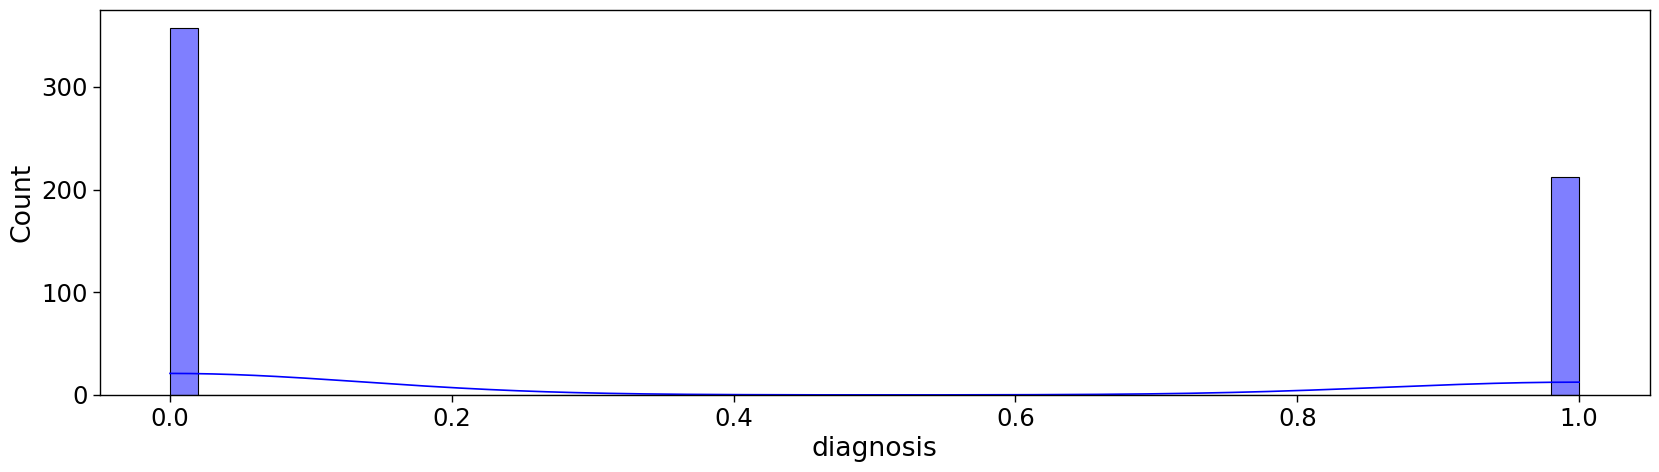

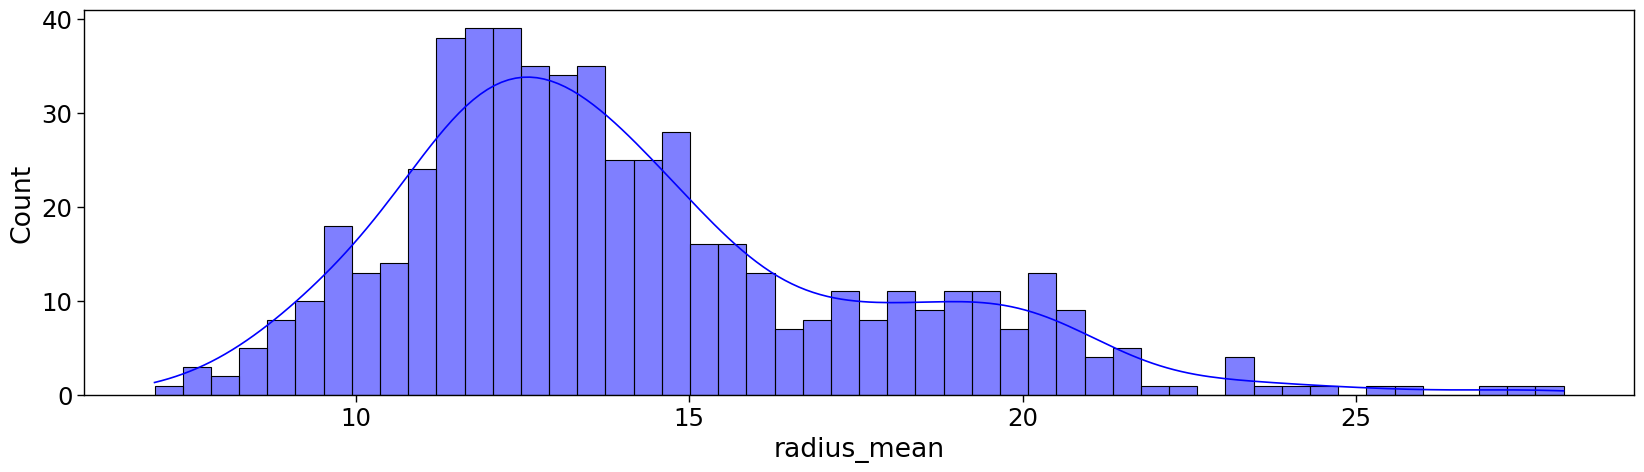

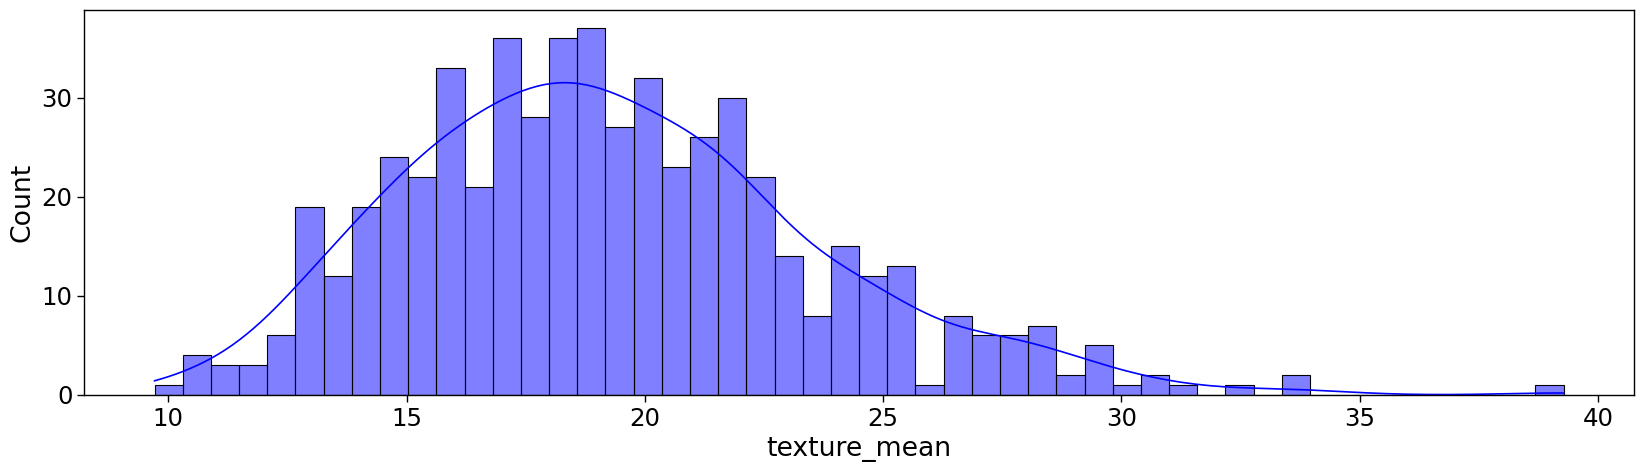

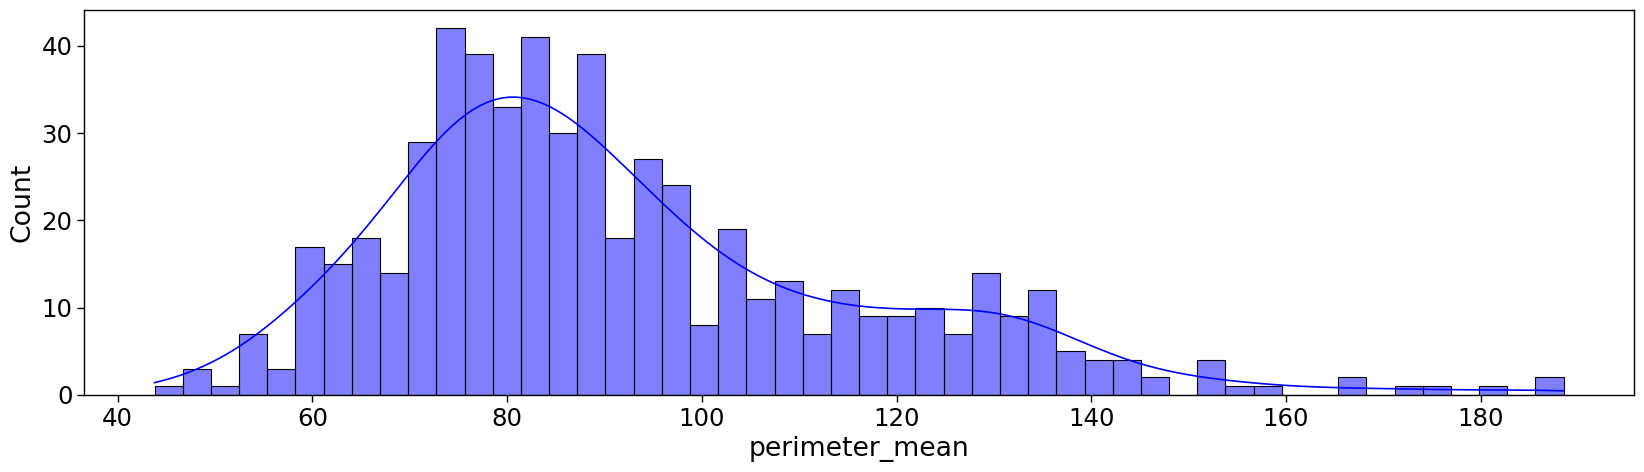

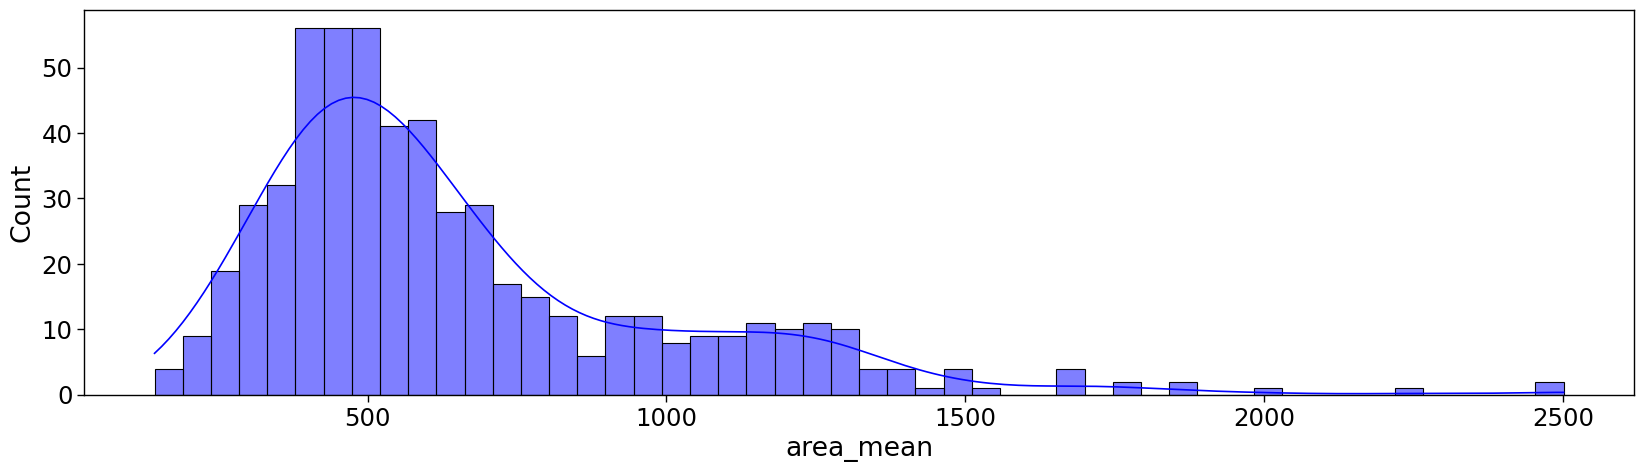

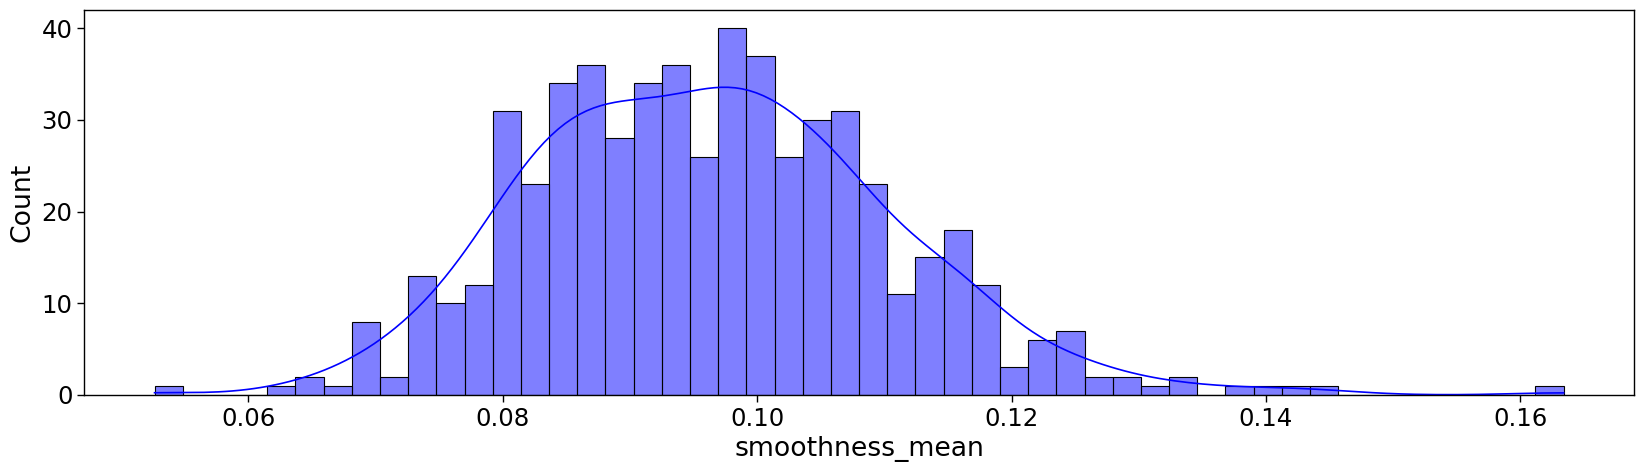

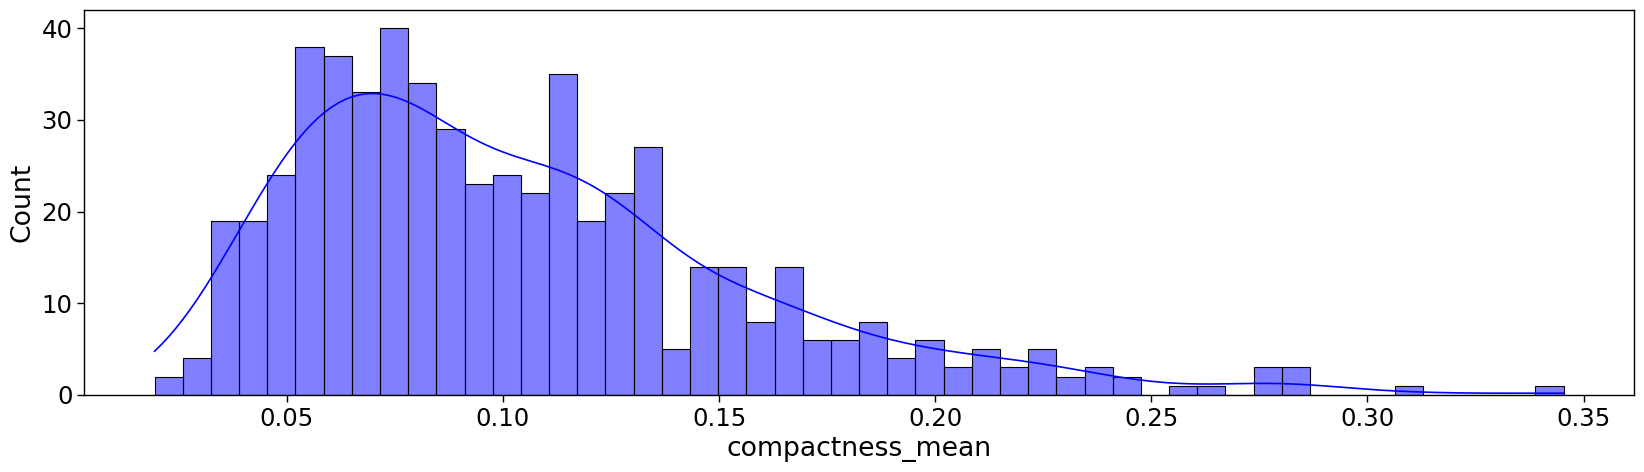

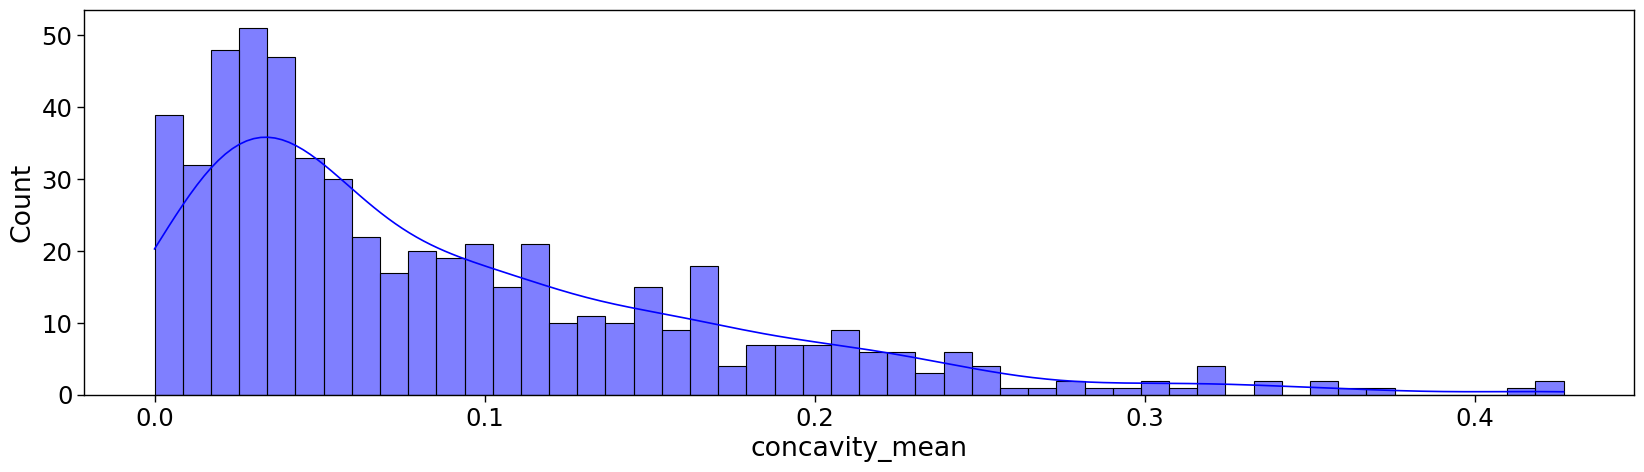

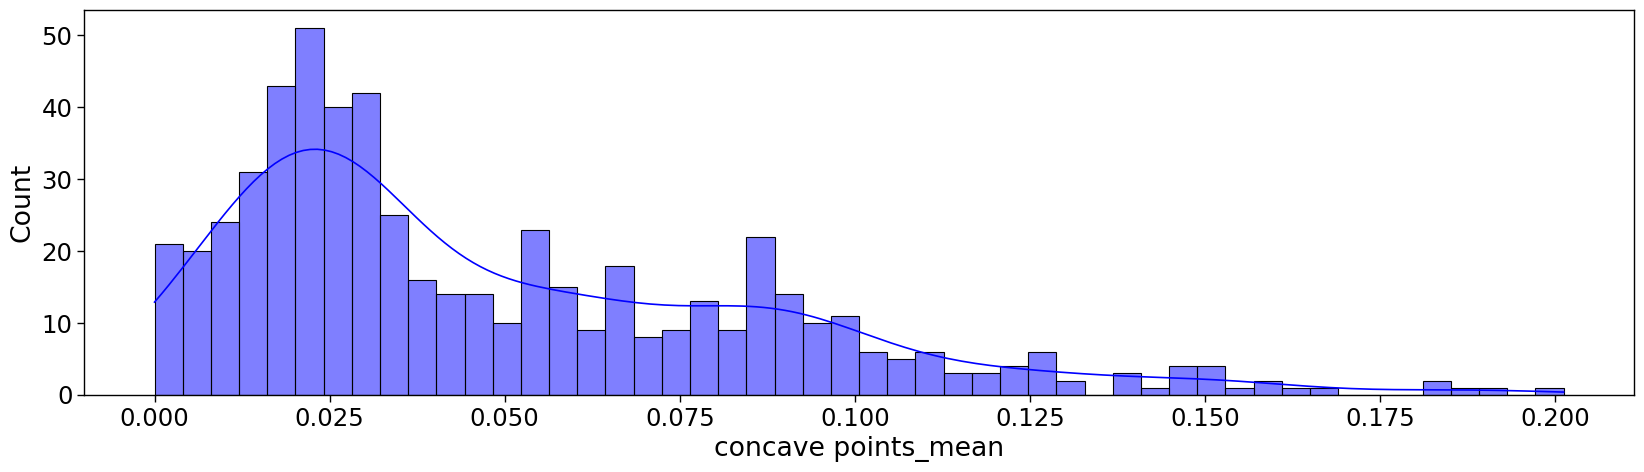

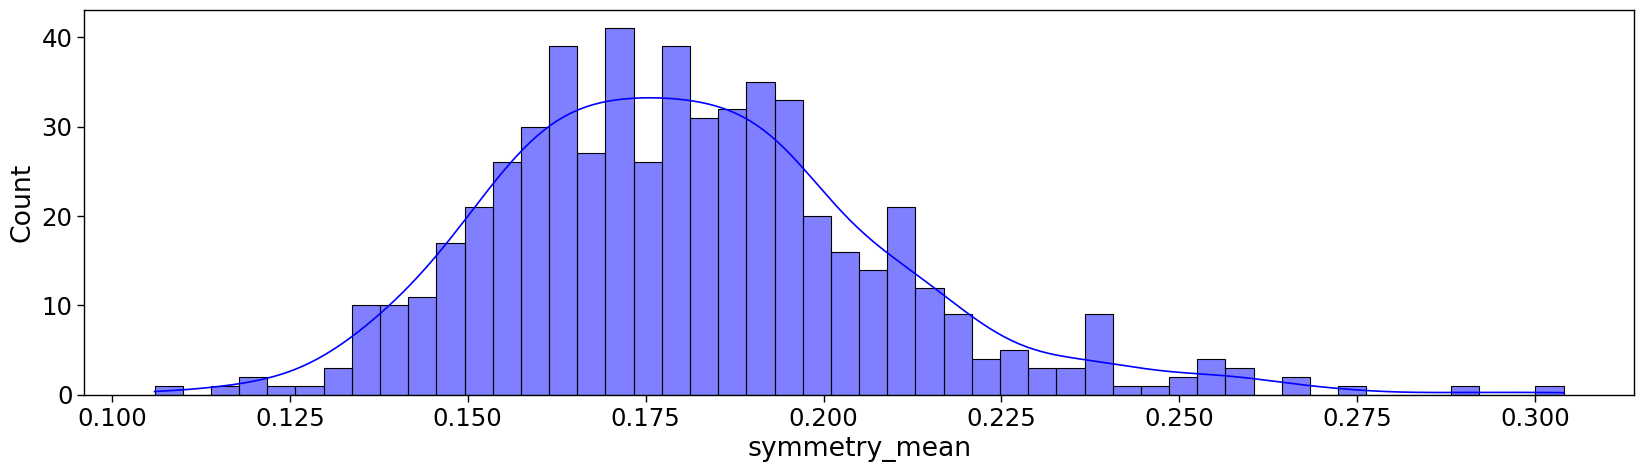

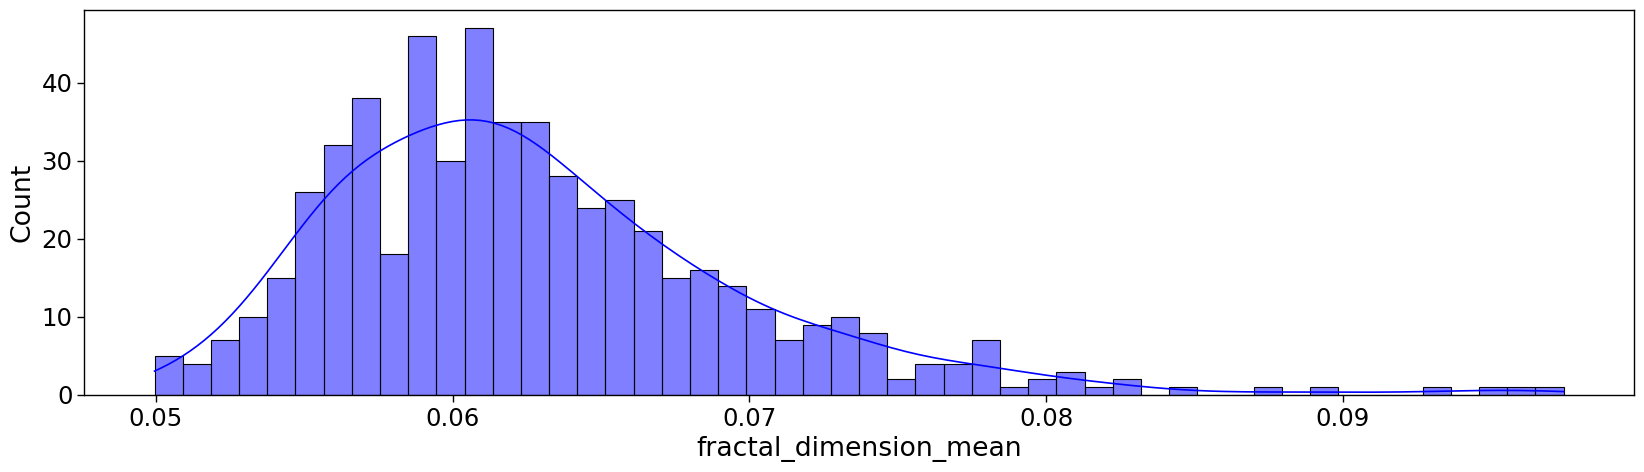

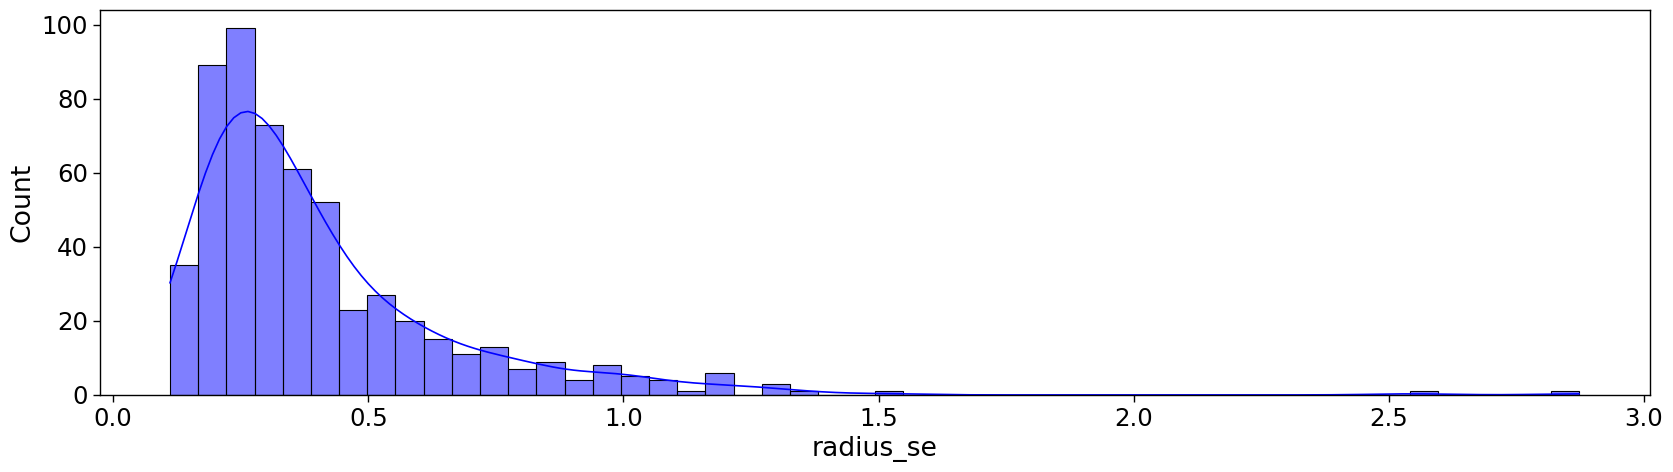

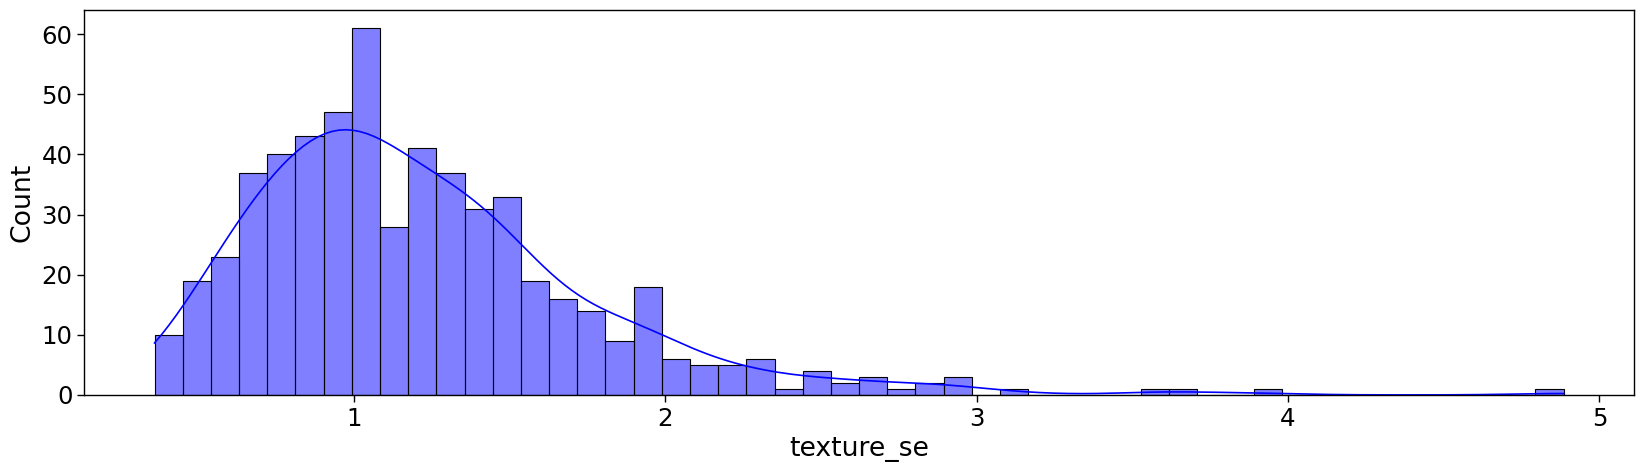

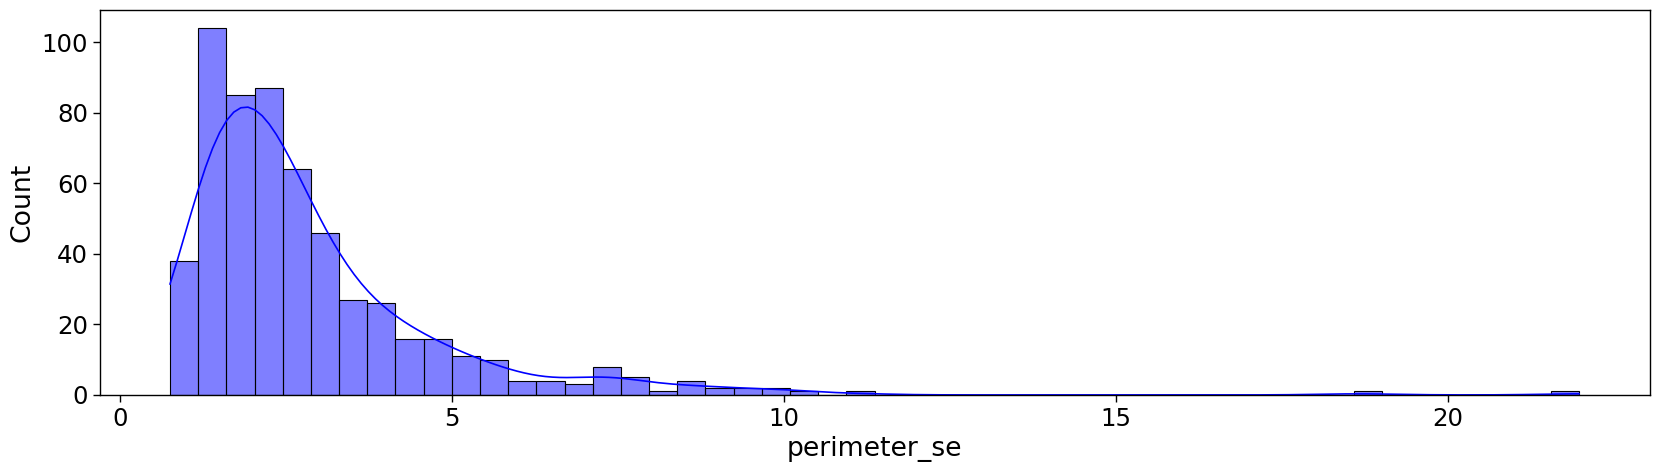

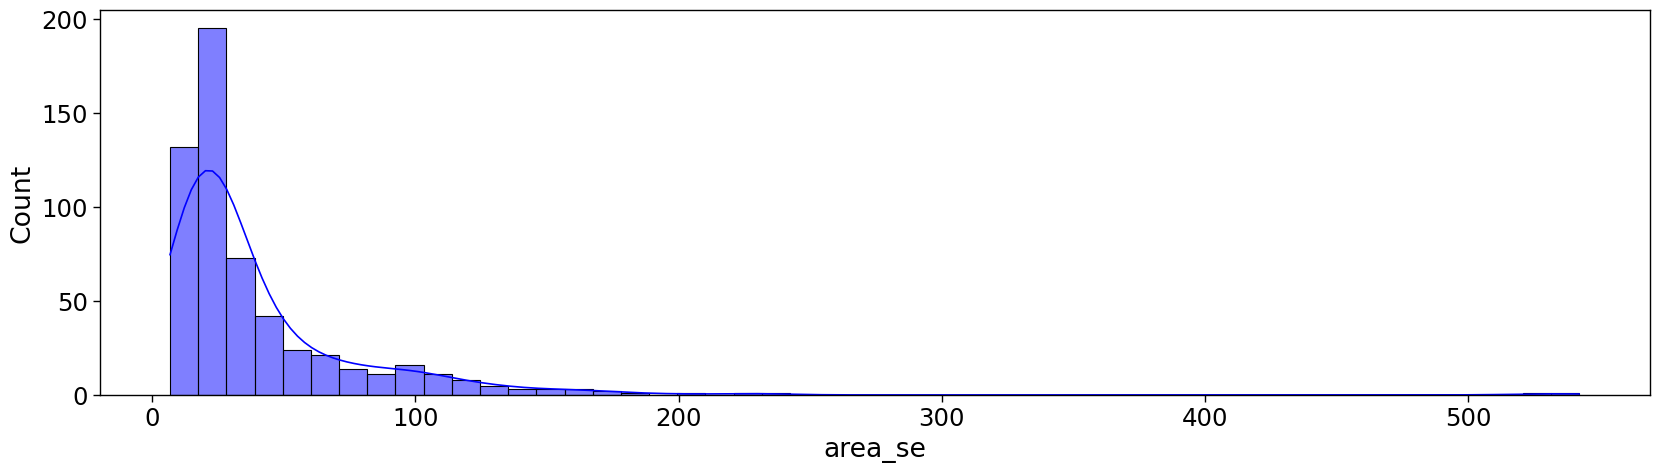

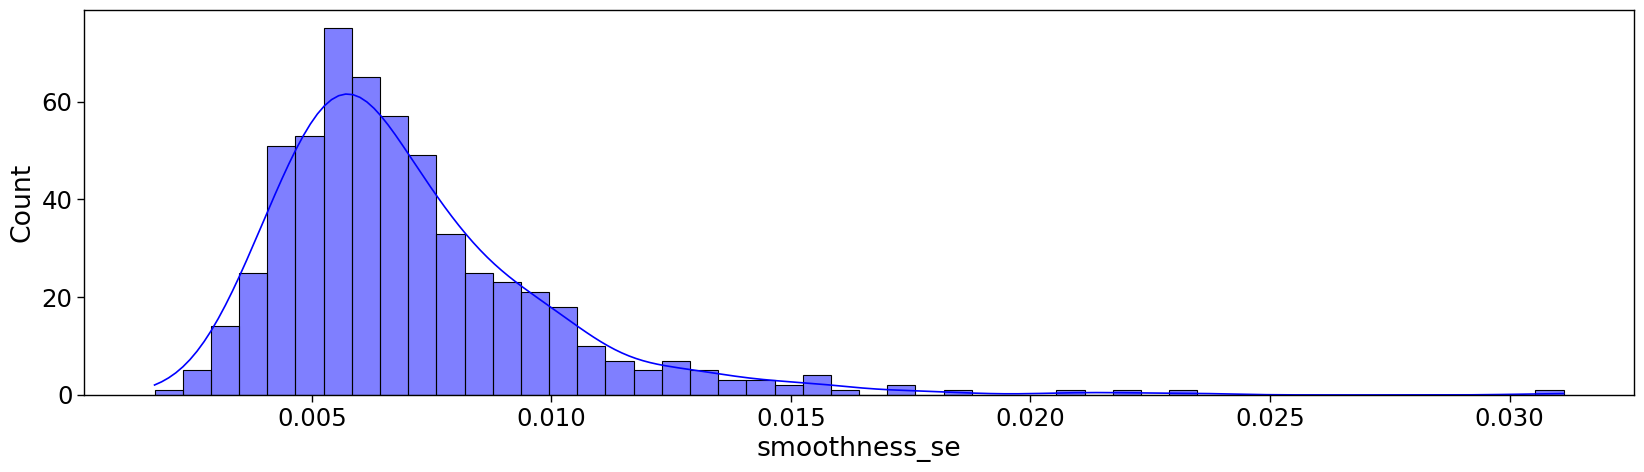

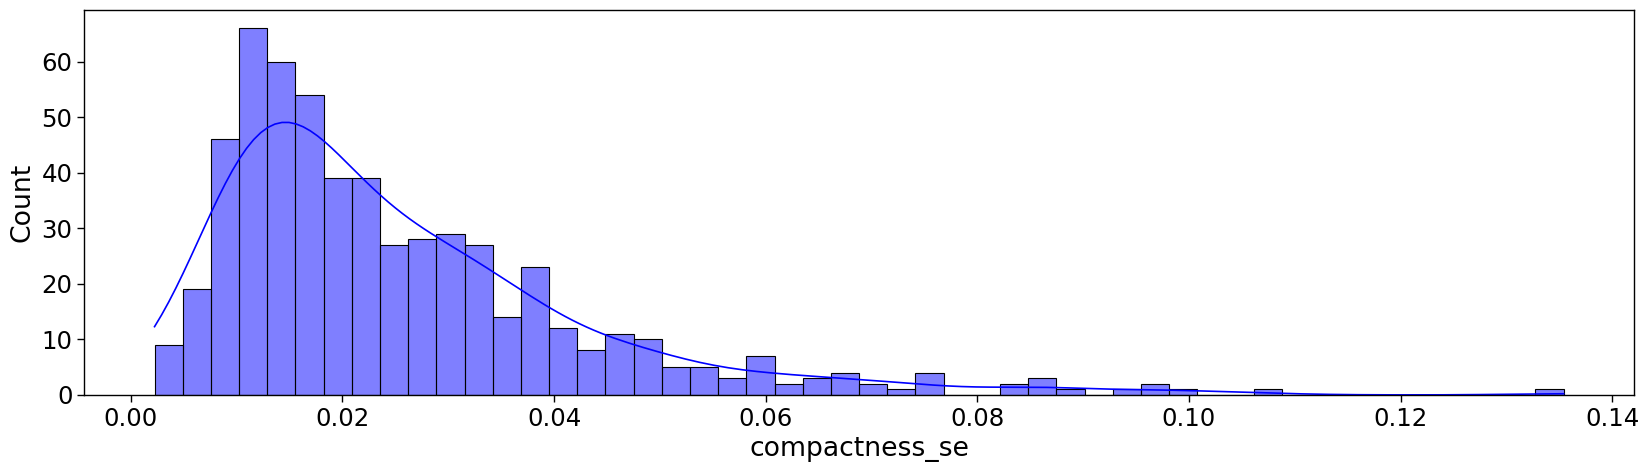

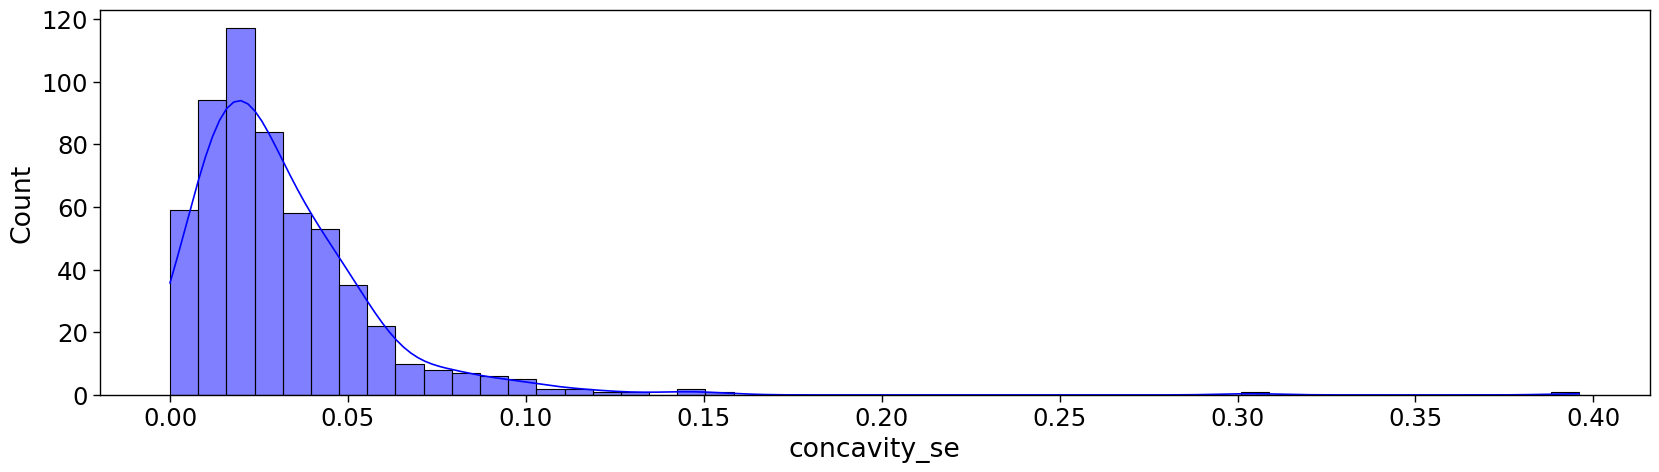

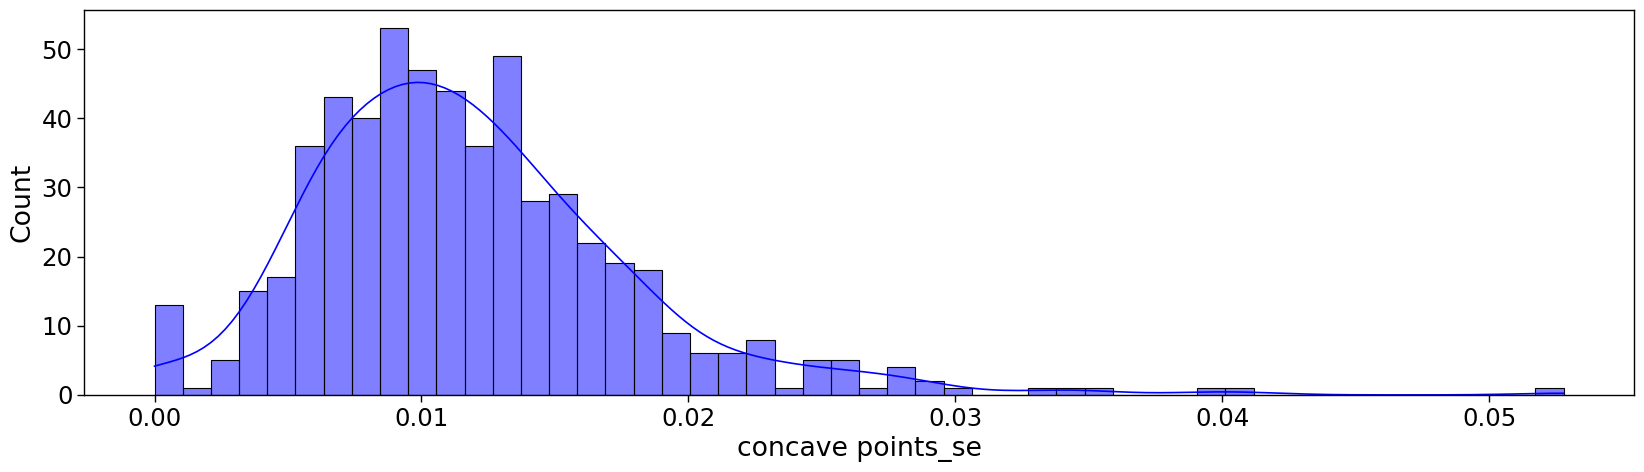

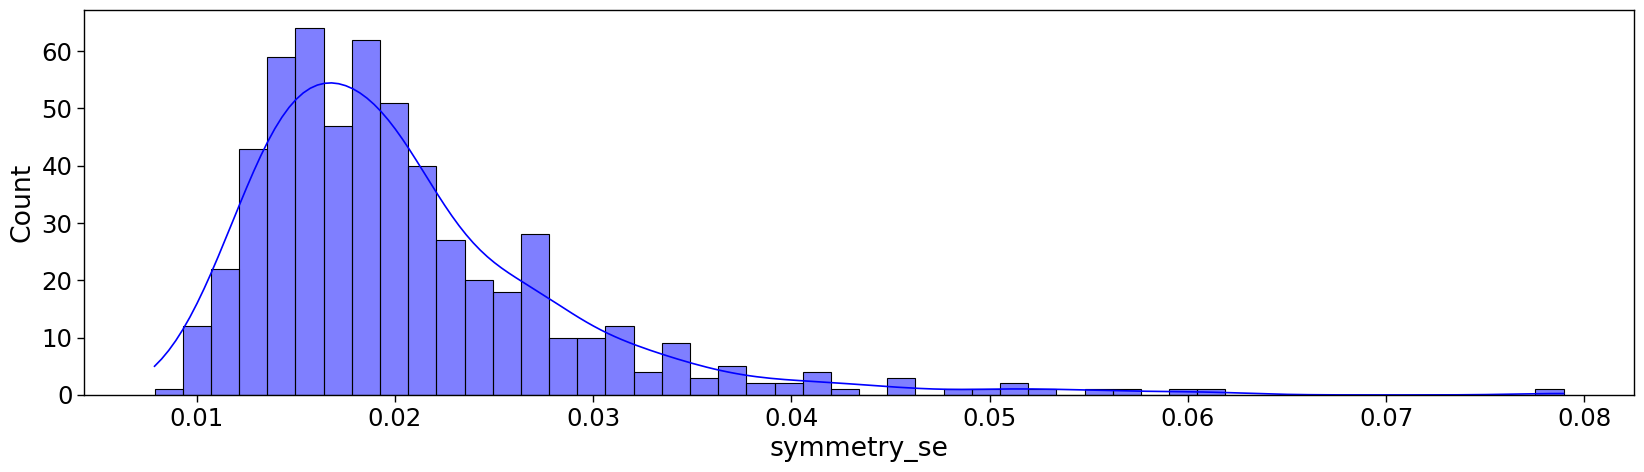

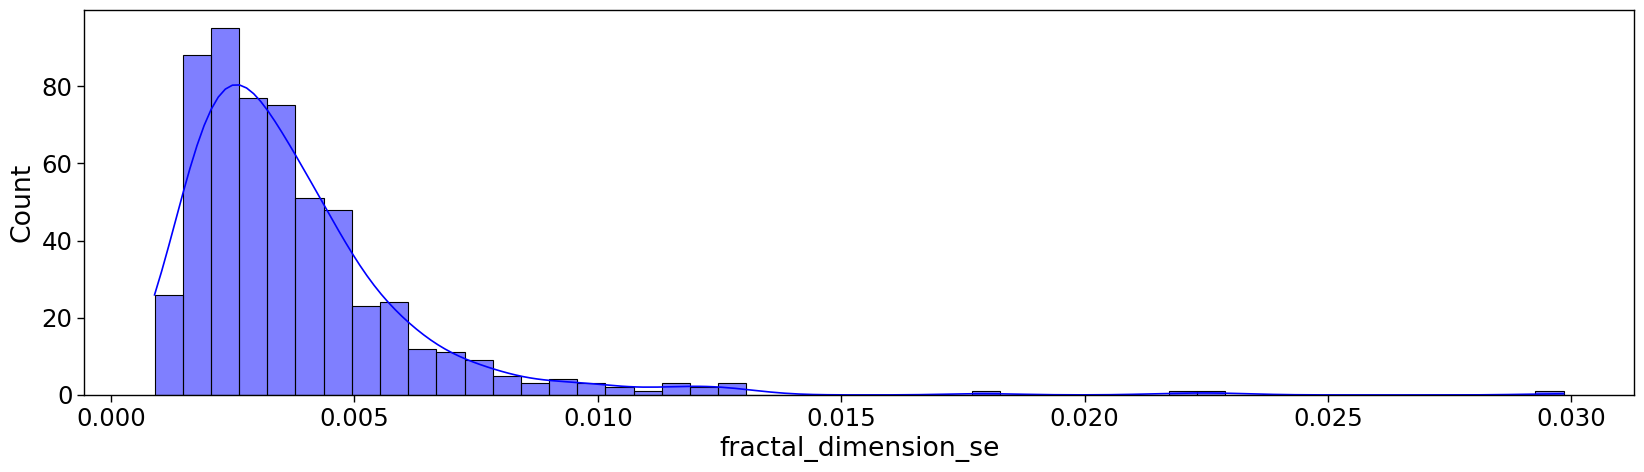

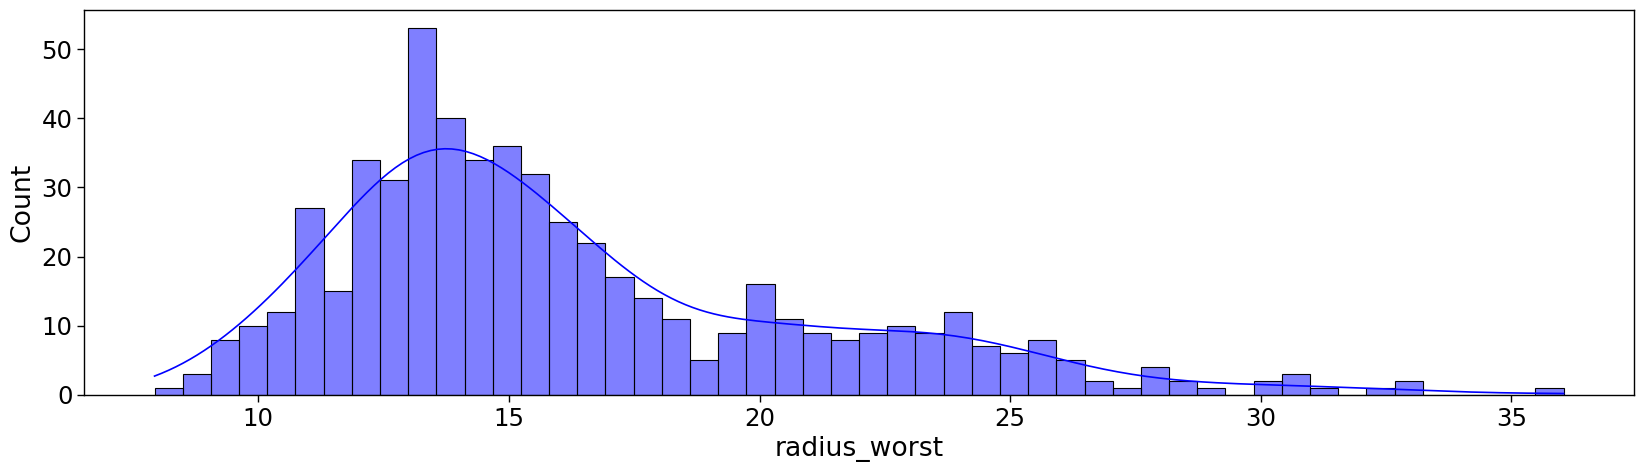

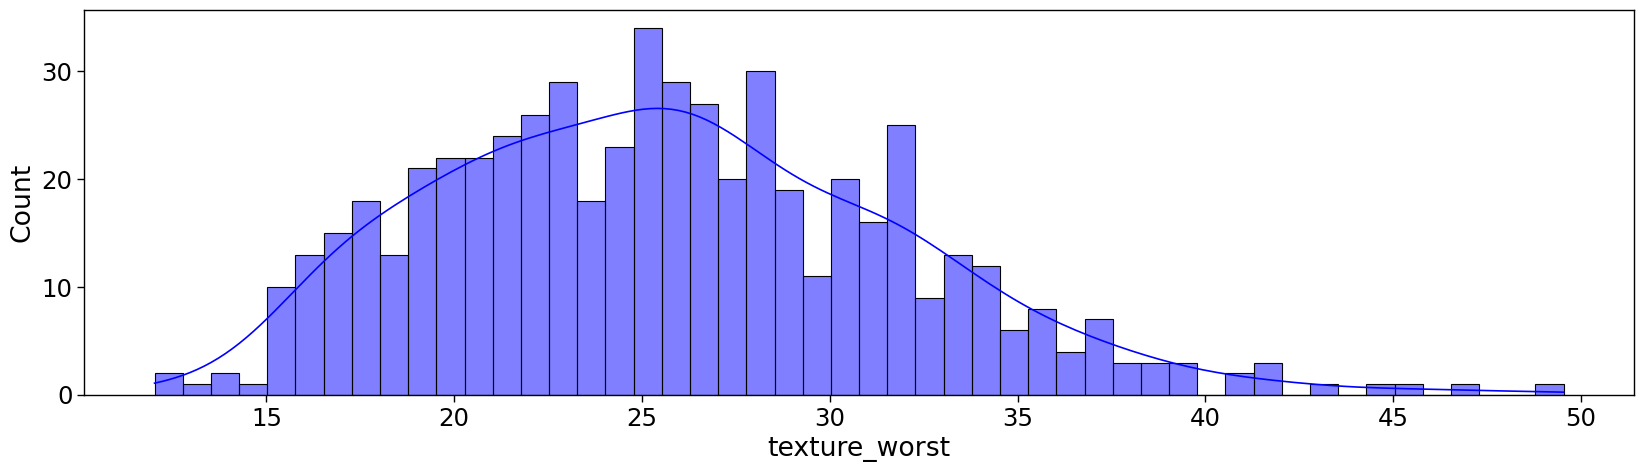

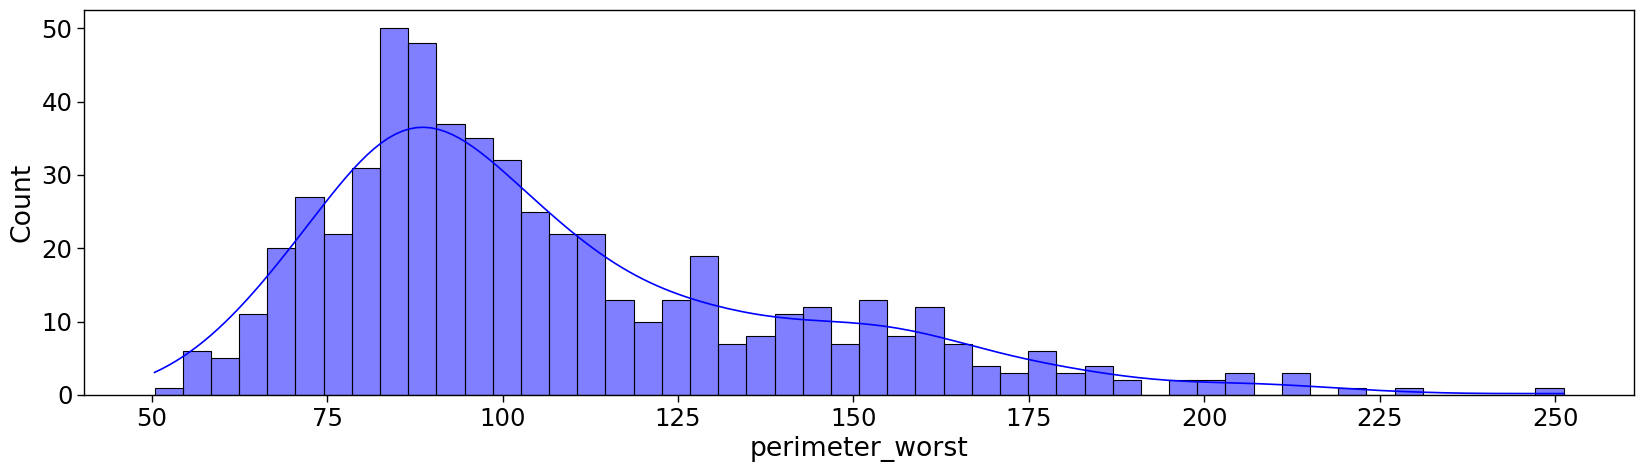

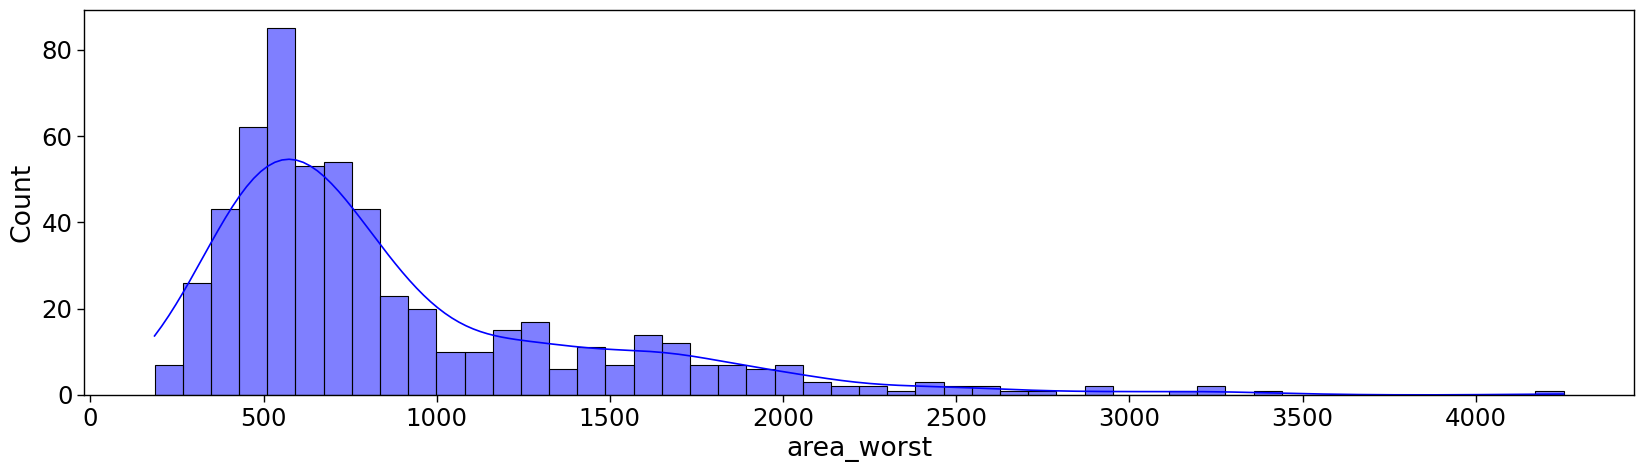

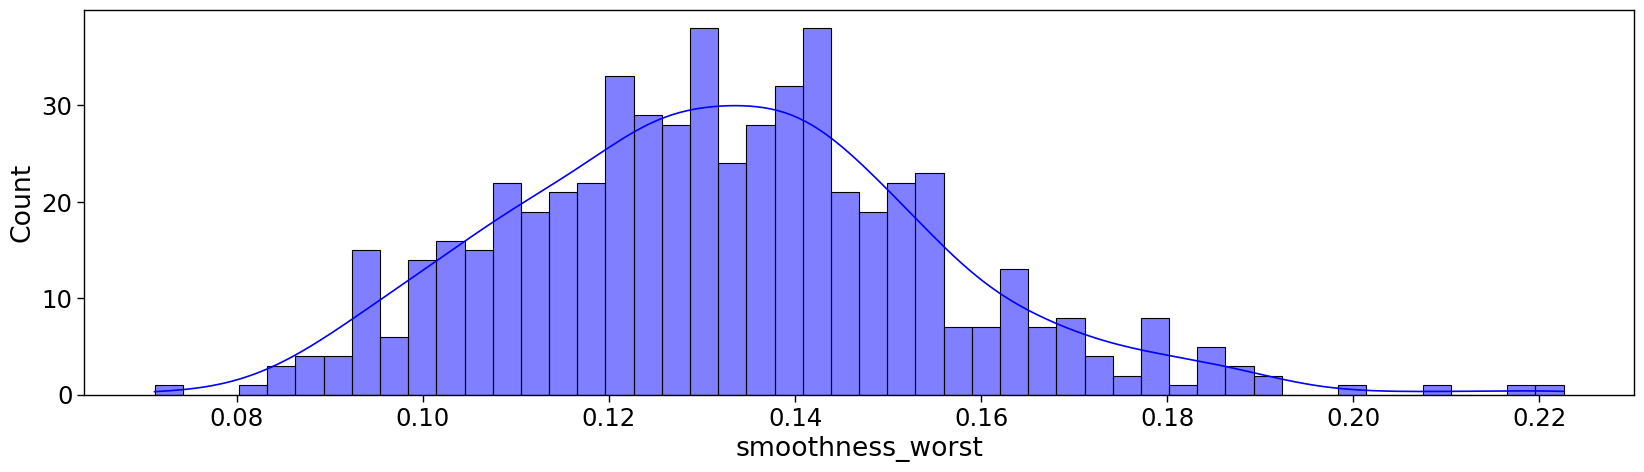

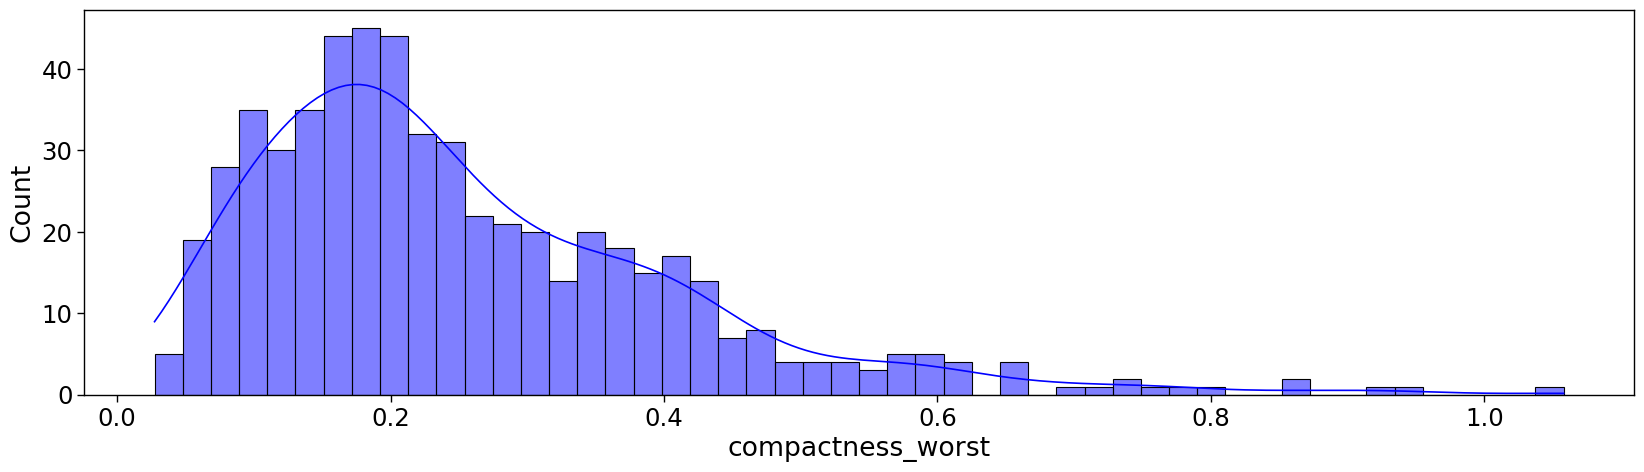

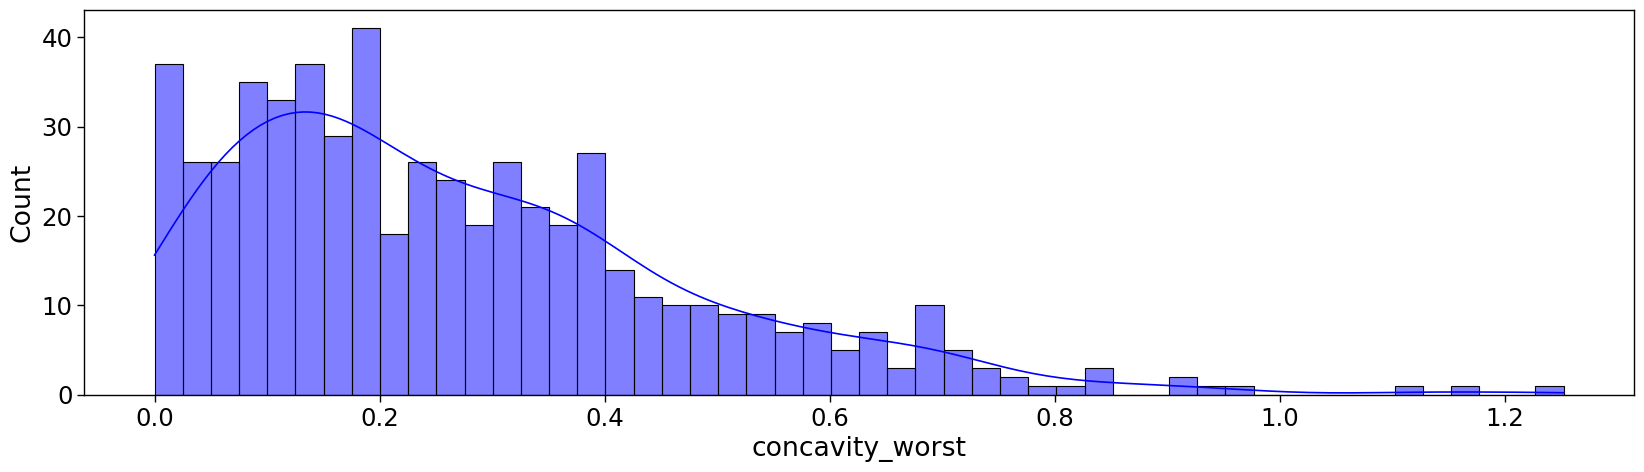

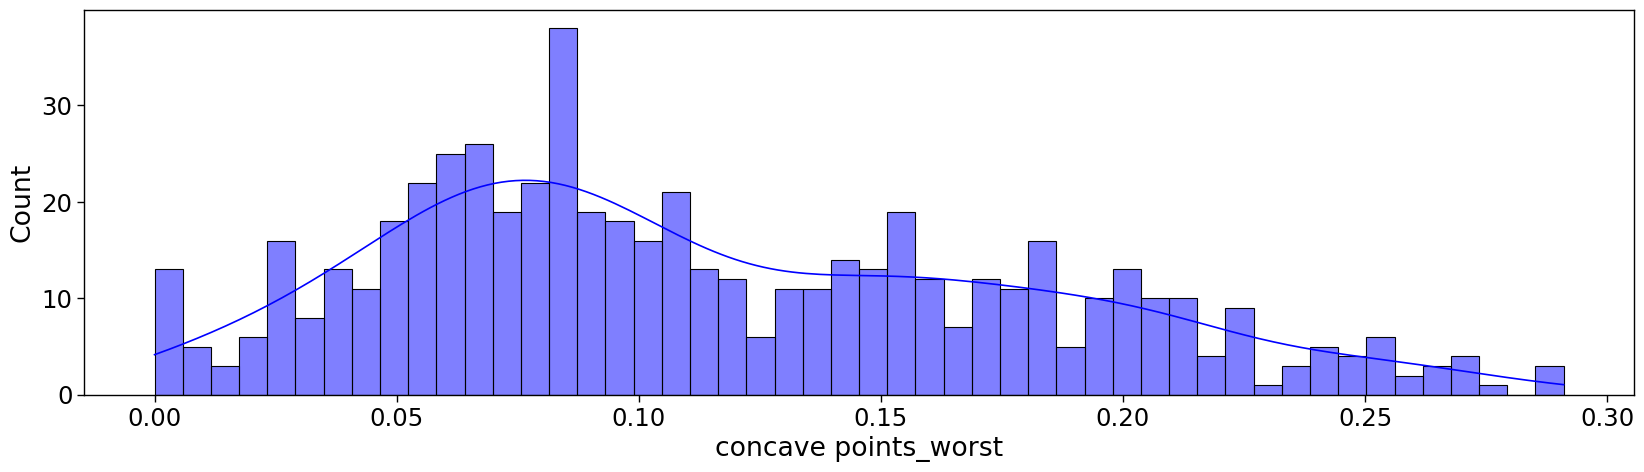

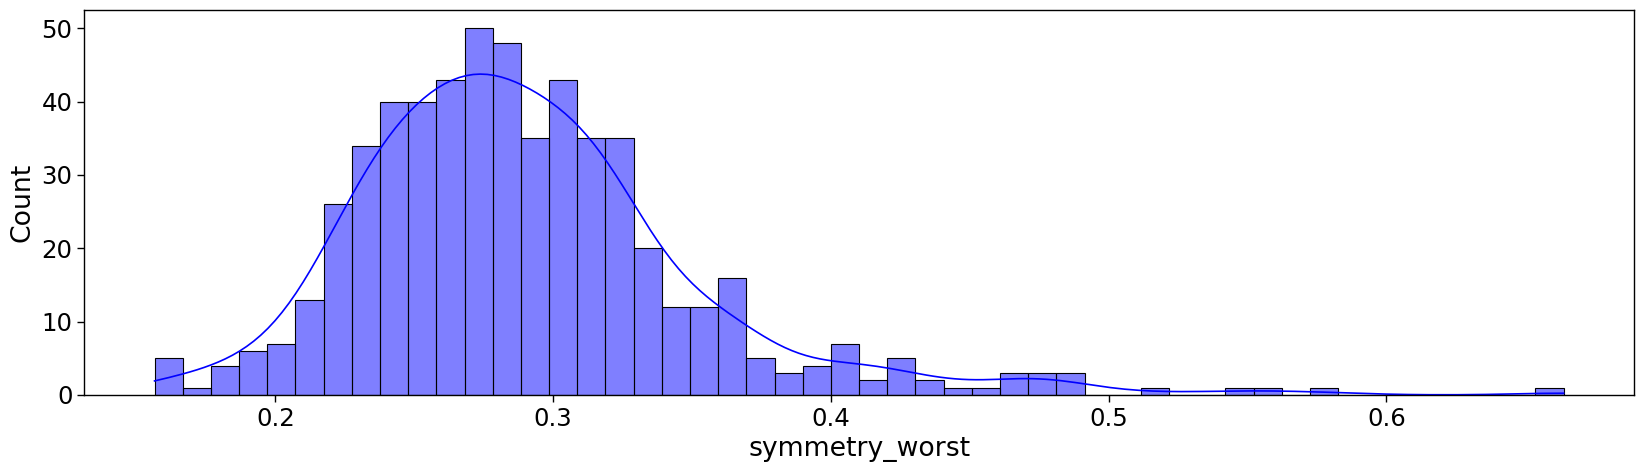

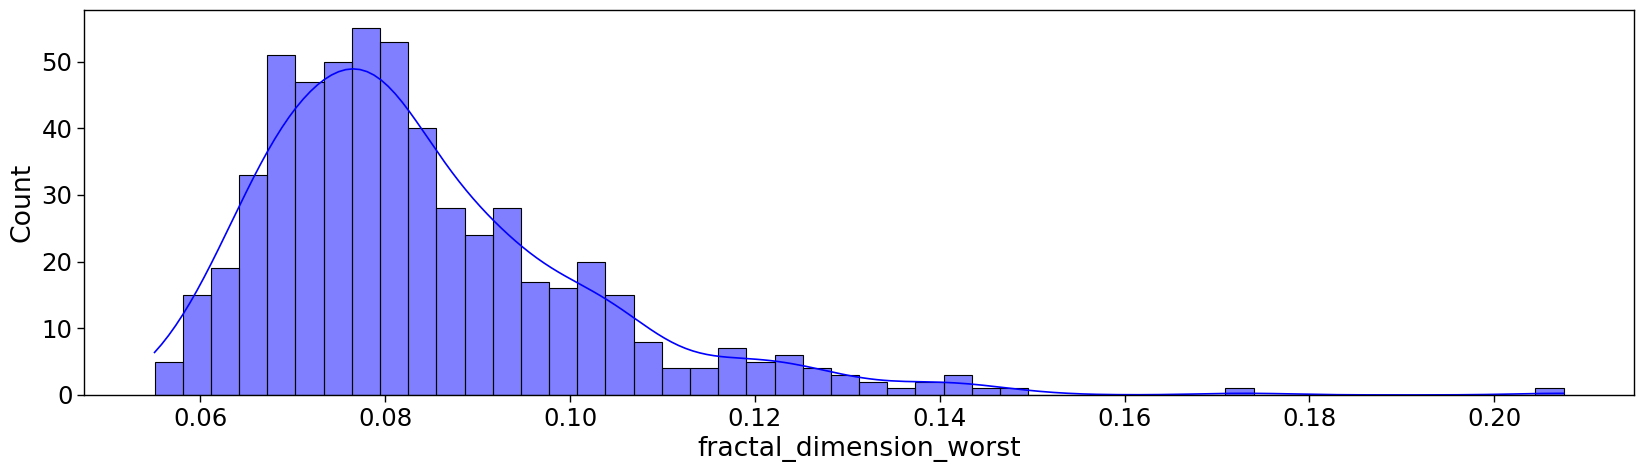

In [8]:
# Print out plots of each variable (column header) along with 
# KDE superimposed
for variable in cancer_variables:
    sns.set_context("paper", font_scale=2)
    plt.figure(figsize=(20, 5))
    sns.histplot(df[variable],color='blue', bins=50, kde=True)
    #plt.show()

## Classifiers review

### Classifier definition

A *classifier* is any algorithm that can categorise information or sort data into labelled classed.<br>
An example of a classifier is the spam filter on your email software.


A *classification model* is the result of the machine learning done by the classifier.<br>
Because the model has been trained using the classifier, it's the model itself that classifies any future data.

There are [*supervised* and *unsupervised*](https://monkeylearn.com/blog/machine-learning-algorithms/#supervised) classifiers.

*Supervised* classifiers need:
- A training dataset
- dataset that has variables already  sorted/categorised

There are two types of *Supervised* classifier types: 
1) *classification*
2) *regression*

With *classification*, the result will always be in a finite set of classes or categories (determined by the training dataset).

With *regression*, the result will be probability as a continuous number value, between 0 and 1. It's used to predict the probability that something will occur, i.e. stock prices, housing market trends, etc.


*Unsupervised* classifiers need:
- An unlabelled dataset

From the unlabelled dataset, the *unsupervised* classifier will determine patterns and anomalies in the data and make classify or structure the data as it sees fit.

As the Wisconsin Breast Cancer dataset contains structured data, only *supervised* classifiers will be used to develop a model for predicting cancer rates.

## Classifier types and applications

<br>


All the algorithms below are types of *supervised* learning algorithms.

### Decision Tree

A decision tree is a classification algorithms that builds models akin to a tree, i.e.<br>

*sports* is the trunk<br>
*sport type* are the branches (field sports, bat sports, etc)<br>
*exact sport name* are the 'leaves', i.e. (soccer, hurling, tennis, etc)<br>

Decision trees use *if-then* rules to classify data into precise categories - however, in order to do this, high-quality data (i.e. no errors or missing values, etc) is needed to avoid the branches being skewed or over-fitted.

### Random Forest

A random forest classifier is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset ([From scikit learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)).<br>
That's where the name comes from - the 'Forest' is multiple decision trees.<br>
It works by randomly selecting a sample of the data and gets the predictions from each tree.

### Naive Bayes Classifier

This is, in fact, a family of probabilistic algorithms.<br>
Naive Bayes calculates the possibility that any given data point may be assigned to a category, or indeed, multiple categories.

Naive Bayes is often used for text analysis to categorise emails, news, articles, customer comments for online reviews, etc, into categories.<br>
Moving from phrase to phrase, the classifier will calculate the probabililty that a data point belongs in that particular category - Yes/No.

### K-Nearest Neighbours

K-Nearest Neighbours is often abbreviated to k-NN.<br>
It's a pattern recognition algorithm and works by learning from training data points and calculates how the data corresponds to other data in the training space.<br>
k-NN wants to:<br>
- find the *k* most closely related (correlated) data points in future data
- by calculating the correlation of data points within *n*-dimensional space

### Support Vector Machines

Support Vector Machines are commonly abbreviated to *SVM*.
SVM algorithms classify data and train models with precision *(rewrite this)* to create a n-dimensional classsification model.
For 2-dimensional data (i.e. x, y) this is simply a line of best fit and not the strongest suit of SVM.
However, for data that is in 3-dimensions, the *hyperplane* (line of best fit) can be very accurate.
SVM create accurate ML models as they were designed to work with multidimensional data.

### Logistic Regression

Logistic regression is an algorithm that predicts a binary outcome.<br>
This can be:<br>
- 1 or 0
- Yes or No
- Pass or Fail

Independent variables can be either categorical or numeric; however, the dependent variable is always categorical, i.e.<br>
"What is the probability of category X given independent variable Y?

## How is a classifer evaluated?

To recap from above ([Classifier definition](#Classifier-definition)), the classifier develops a model after learning from the test data; however, one must know *how well* the classifer learns and if the model is good enough for the task at hand.<br>
The metrics used for classifier evaluation are determined from the models performance in the *test* set.<br>

The simplest evaluation for classifiers is **accuracy**.<br>
Accuracy is the fraction of data points that are correctly classified (i.e. correctly predicted from the training data).
Accuracy is calculated to be the sum of true positives and true negatives divided by all data points.<br>
Consider the equations below:<br>

$TP$ = True Positives<br>
$TN$ = True Negatives<br>
$FP$ = False Positives<br>
$FN$ = False Negatives<br>
$Total$ = Total data points<br>


$$Accuracy = \frac{TP + TN}{Total}$$<br>

$$Precision = \frac{TP}{TP+FP}$$<br>

$$Recall = \frac{TP}{TP+FN}$$<br>

### Confusion Matrix

Draw diagram and put it here 

### Precision and Recall

**Precision** is the measurement determined by the correctly classified positive data points divided by the total number of data points that are classed as positive.<br>

**Recall** is the measurement of correctly classified positive data points divided by the total number of actuall positives in the test set.<br>

*Precision-Recall* is an important metric in evaluating a classifier.<br>
*High Precision* means that a classifier returned much more relevant results than irrelevant;<br>
*High Recall* means that a classifier returned most of the relevant results. 

### ROC Curve and AUC

ROC stands for *Receiver Operating Characteristic* and AUC stands for *Area Under ROC Curve*.
[Google Developers](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) gives a good definition of what this is.<br>

Essentially, the ROC Curve is a graph showing the performance of the classification model at all thresholds.<br>
$FPR$ = False Positive Rate<br>
$TPR$ = True Positive Rate = $Recall$<br>


$FPR$ and $TPR$ are the two parameters that are plotted against each other.<br>

$$FPR = \frac{FP}{FP+TN}$$<br>
and<br>
$$Recall = \frac{TP}{TP+FN}$$<br>

The ROC curve plots FPR vs TPR (x vs y) at different classification thresholds.<br>
If the classification threshold is lowered, False Positives and True Positives are increased.<br>
Tools like scikit-learn can be used to plot an ROC curve.<br>




After the ROC curve is plotted, the area under the curve can be determined.<br>
The mathematics to determine this is calculus (integral calculus), integrating between 0 and 1.<br>

AUC is mainly used because:<br>
- It measures the ranking of predictions, rather than absolute values.
- It measures the quality of predictions regardless of what classification threshold is chosen by the user.

### F1 score

The F1 score is another metric that's used to evaluate a machine learning model.<br>
The F1 score balances Precision and Recall.<br>


**Precision** is the ability of the classifier not to label a true negative as a positive.<br>

**Recall** is the ability of the classifier to find all positive results.<br>

**F1 score** is the balance between **Precision** and **Recall**.<br>

The F1 score is defined as:

$$F_1 = \frac{Precision * Recall}{Precision + Recall}$$

## Literature review

The following is a review of the papers that were found when researching the topic.<br>
Acronyms:<br>
**Algorithms**<br>
- NB: Naive Bayes
- SMO: Sequential Minimal Optimization
- J48: Decision Tree
- KNN: K-Nearest Neighbours
- SVM: Support Vector Machines
- RF: Random Forest
- XGBoost: eXtreme Gradient Boosting
<br>

**Analysis**<br>
- PCA: Principal Components Analysis
- AUC: Area Under Curve
- LR: Linear Regression
- RFE: Recursive Feature Elimination

[S. Shetty:](Wisconsin_papers/simithasitaramshetty.pdf)<br>
An (unmarked) Master's thesis submission so wouldn't be placed as highly in terms of what's being done, however, outlines some points:
<br>
- Reviews neural networks
- Outlines framework
- How Feature Selection is determined
- Reviews classifiers
- Evaluation of classifiers

[R. Dang, A. Nilsson](Wisconsin_papers/Evaluation_Breast_Cancer.pdf)<br>
Another paper, as part of an undergraduate project:<br>
- Explains PCA well
- Mathematical explanation of classifiers
- Defines classification accuracy, sensitivity and specificity
- Evaluates classifiers

[Z. Zhang, Z. Li](Wisconsin_papers/evaluation_classifers.pdf)<br>
A journal paper specifically focussing on the evaluation methods used for breast cancer prediction.
- Focusses on five classifiers - supervised learning.
- Covers what methods have been used historically to test classifiers
- Goes into Area Under Curve (AUC) for each classifier
- Defines Precision-Recall curve and it's relation to the the model
- Concluded that overall, Linear Regression (LR) performed best for classification

[S. A. Mohammed et al](Wisconsin_papers/Breast-Cancer-detection_Chapter_10.pdf)<br>
3 authors - wasn't sure whether this was a journal paper, however, references other papers well.<br>
- Comprehensive literature review in tabular format with:
    - Paper title
    - Dataset used (majority of which is Wisconsin)
    - Algorithms used
    - Results of algorithms
- Focusses on three classifiers only: NB, SMO and J48
- 10 fold cross validation after data preprocessing, before classification
- Concluded SMO was the best classifier


[V. Magboo, Ma. Magboo](Wisconsin_papers/breast_cancer_classifiers.pdf)<br>
Seems to be another journal paper by two authors.<br>
Slightly different to the other papers thus far, in the sense that four algorithms are all evaluated, but in a slightly different way each time.
- LR, NB, KNN and SVM evaluated
- First way is the 'normal' way of EDA, data preprocessing, train/test split and 10-fold cross validation before training
- Second way uses PCA after data preprocessing
- Third way uses second way plus random oversampling on training set
- Fourth way is the same as second but correlation is used to remove features instead of PCA
- LR was concluded to be the best method


[S. Abdulkareem, Z. Abdulkareem](Wisconsin_papers/ensemble_classifiers_wisconsin.pdf)<br>
Another [journal](https://www.ijsr.net/) paper, most likely from potential PhD students from looking at the [requirements of publishing](https://gssrr.org/index.php?journal=JournalOfBasicAndApplied?journal=JournalOfBasicAndApplied) in the journal.<br>
Hard to read because of the formatting. 

- Looks at two ensemble classifiers only: RF and XGBoost
- Explanations of RF and XGBoost
- Uses RFE to determine which variables contribute to producing a positive diagnosis
- XGBoost was concluded to be the best with 99% accuracy




## Statistical analysis of dataset

When doing any analysis or plotting, the variables will be named as follows:<br>
*variable_name*_*statistic_name* <br>
i.e.<br>
*concave points_worst* would become<br>
cpw_mean

Comments in the code will explain further.

### Ratio of negative to positive results

How many negative results versus positive from the dataset?

In [9]:
# below gives the percentage of negative (0) versus positive (1)
df["diagnosis"].value_counts('0')*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

So approximately 63% negative and 37% postive results in the dataset.

### Correlation between variables and diagnosis

In [10]:
# Correlated variables, descending, assign to variable.
var_cor_desc = df.corr()['diagnosis'].sort_values(ascending = False)
print(var_cor_desc, '\n')
print(f'Number of variables: {len(var_cor_desc)}')

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

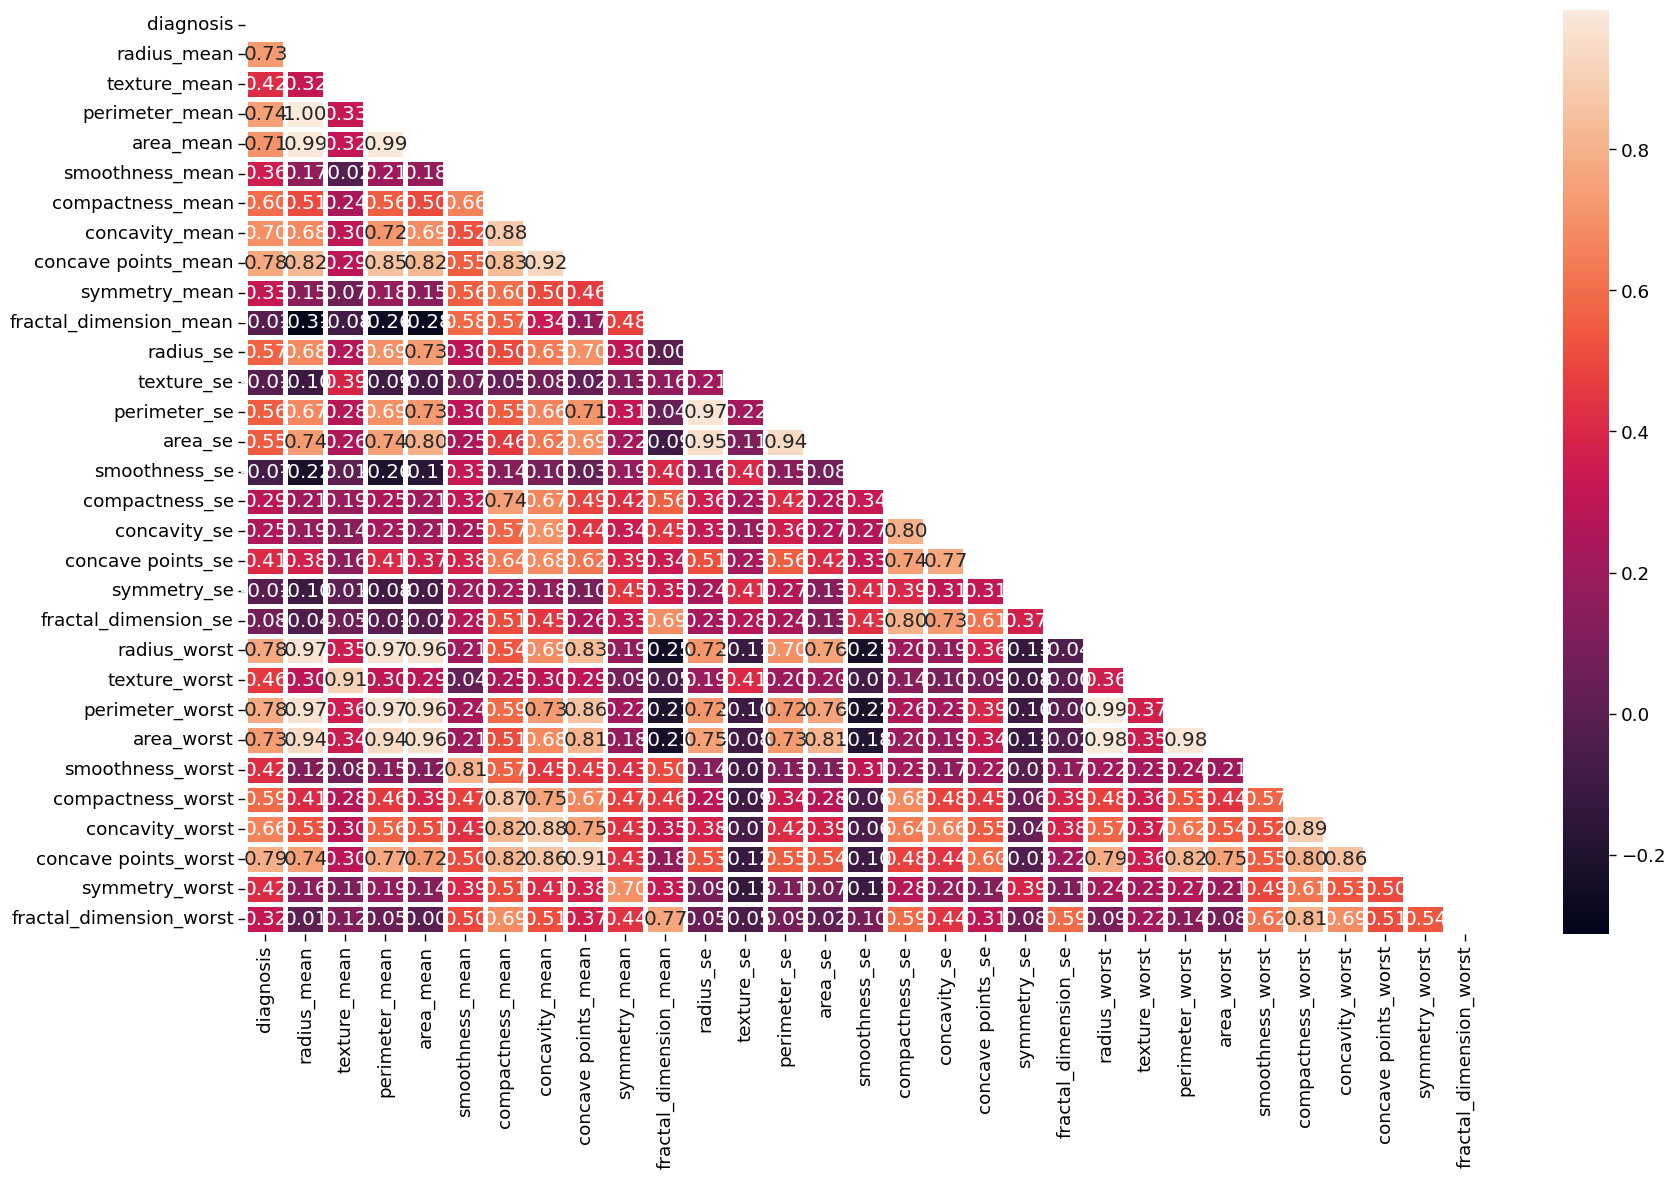

In [11]:
# heatmap for variables
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize = (20, 12))

# variable for correlation between variables
corr = df.corr()
# Uppper triangle of an array
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 2.5, annot = True, fmt = ".2f")
plt.show()

### Remove uncorrelated variables

Now the variables will be filtered, so that only the variables that have a correlation higher than 0.54 will be looked at.<br>
Why?<br>
The variables are reduced from 31 to 16, approximately a 48% reduction. Only the variables deemed to be positively correlated to diagnosis will be looked at.<br>
Also note that there's no negatively correlated variables.<br>

In [12]:
# pos_cor_var are the positively correlated variables with diagnosis


pos_cor_var = df.corr()[abs(df.corr()['diagnosis']) > 0.54].index
print(f'Positively correlated variables:')
print(pos_cor_var.sort_values(ascending = False), '\n')
print(f'Number of positive variables: {len(pos_cor_var)}')

Positively correlated variables:
Index(['radius_worst', 'radius_se', 'radius_mean', 'perimeter_worst',
       'perimeter_se', 'perimeter_mean', 'diagnosis', 'concavity_worst',
       'concavity_mean', 'concave points_worst', 'concave points_mean',
       'compactness_worst', 'compactness_mean', 'area_worst', 'area_se',
       'area_mean'],
      dtype='object') 

Number of positive variables: 16


### Re-plot correlated variables

Take the 16 variables above and plot using a clustermap.<br>
This is like a heatmap, but where the variables are clustered.<br>

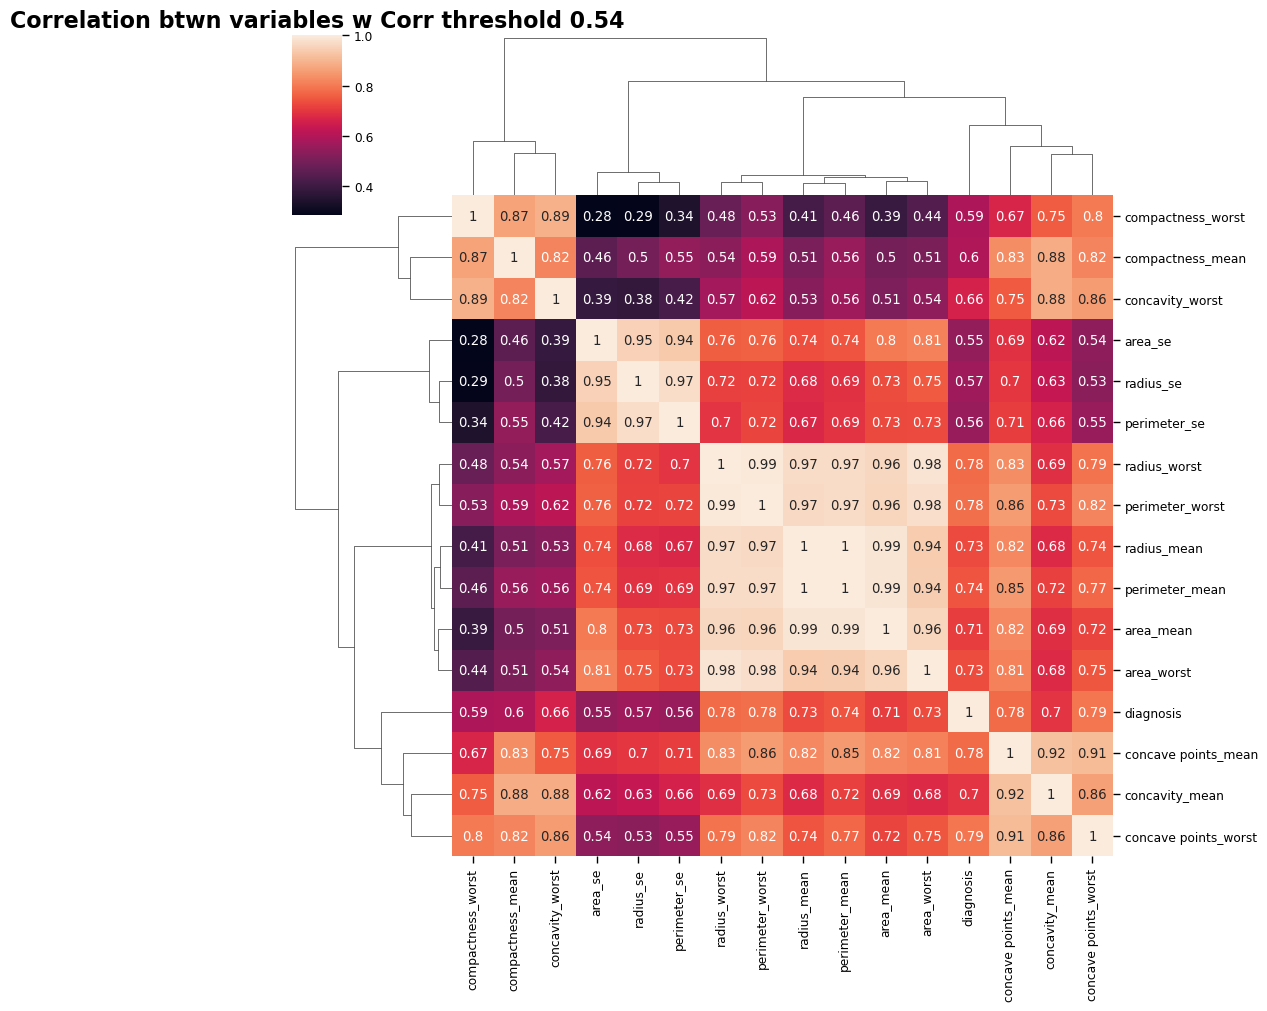

In [13]:
corr_matrix = df.corr()
# Threshold that was set above for the correlation
threshold = 0.54 
var_filter = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[var_filter].tolist()

# Seaborn 
sns.set_context("paper", font_scale=1)
sns.clustermap(df[corr_features].corr(), annot = True)
plt.title("Correlation btwn variables w Corr threshold 0.54", fontweight = "bold", fontsize=16)
plt.show()

From the clustermap above, only the variables correlated diagnosis above 0.54 are plotted.<br>
It can be seen that some variables have a high correlation with each other.

## Training the classifiers

### Prepare the input

In [14]:
X = df.drop(["diagnosis"], axis = 1)
y = df["diagnosis"]
cols = df.columns.tolist()

### Train, test, split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state = 42)

# Dont fit the scaler while standardizate X_test !
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Decision Tree

The code below produces a decision tree classifier based on the training data.<br>
It uses [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to determine the best parameters for an estimator.<br>

In [16]:
dec_tree = DecisionTreeClassifier(random_state=10)

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(1, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    
    #If 1 is entered, throws ValueError
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

# cv = cross-fold validation. Defaults to 5
# n_jobs = number of jobs to run in parallel. -1 means uses all processors
gs_dec_tree = GridSearchCV(dec_tree, parameters, cv = 5, n_jobs = -1, verbose = 1)
gs_dec_tree.fit(X_train, y_train)

Fitting 5 folds for each of 8928 candidates, totalling 44640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

Get the best parameters from GridSearchCV:

In [17]:
# Best parameters from GridSearchCV
gs_dec_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'random'}

Get the best score from GridSearchCV:

In [18]:
# Get the best score from GridSearchCV
gs_dec_tree.best_score_

0.9673417721518988

Use the best parameters above to put into the classifer again:

In [19]:
dec_tree = DecisionTreeClassifier(criterion = 'entropy', 
                                  max_depth = 5, 
                                  min_samples_leaf = 6, 
                                  min_samples_split = 2, 
                                  splitter = 'random')
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=6,
                       splitter='random')

Test the classifier and test the performance with an accuracy score for the training and testing, as well as the confusion matrix for the decision tree.

In [20]:
# Assign a variable to the testing portion
y_pred = dec_tree.predict(X_test)

In [24]:
# Print the training score
print("Training score:")
print(accuracy_score(y_train, dec_tree.predict(X_train)))

# Print the predicted score
print("\nPrediction score:")
dec_tree_acc = accuracy_score(y_test, dec_tree.predict(X_test))
print(dec_tree_acc)

# Print the confusion matrix:
print("\nThe confusion matrix for the decision tree:")
print(confusion_matrix(y_test, y_pred))

Training score:
0.9371859296482412

Prediction score:
0.9590643274853801

The confusion matrix for the decision tree:
[[102   6]
 [  1  62]]


Get the benchmark for the classifier:

In [26]:
# Print the classifier report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       108
           1       0.91      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### Random Forest

The code below defines a [Random Forest classifier](https://scikit-learn.org/stable/modules/ensemble.html#random-forests).

In [46]:
# Defining a Random Forest Classifer.
# Values were taken from the code example in scikit learn
# n_estimators = number of trees in the forest (decision trees)
# max_depth = 
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
# Pass in training values
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [51]:
# Define a model and pass in testing values
y_pred = rfc.predict(X_test)

In [58]:
# Print the accuracy score from training and predicted values

print("The accuracy score from the training values:")
print(accuracy_score(y_train, rfc.predict(X_train)))

print("\nThe accuracy score from the predicted values:")
rfc_clf_acc = accuracy_score(y_test, y_pred)
print(rfc_clf_acc)

print("\nThe confusion matrix for the random forest classifier:")
print(confusion_matrix(y_test, y_pred))

The accuracy score from the training values:
1.0

The accuracy score from the predicted values:
0.9707602339181286

The confusion matrix for the random forest classifier:
[[107   1]
 [  4  59]]


Clearly, an accuracy of 1.0 just seems wrong, but everything else seems ok.<br>
The classifier benchmarks are printed below.<br>

In [59]:
# Print the classifier report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### Logistic Regression

The code below defines a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

In [60]:
# Define a logistic Regession model
log_reg = LogisticRegression()

# Pass in the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Get the predicted values
y_pred = log_reg.predict(X_test)

In [62]:
# Get the accuracy score from the training and testing values and the confusion matrix
print("The accuracy score from the training values:")
print(accuracy_score(y_train, log_reg.predict(X_train)))

print("\nThe accuracy score from the predicted values:")
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

print("\nThe confusion matrix for the Logistic Regression classifier:")
print(confusion_matrix(y_test, y_pred))

The accuracy score from the training values:
0.9874371859296482

The accuracy score from the predicted values:
0.9824561403508771

The confusion matrix for the Logistic Regression classifier:
[[106   2]
 [  1  62]]


Print out the classifier report.

In [ ]:
print(classification_report(y_test, y_pred))

### K Nearest Neighbors

### Support Vector Classifier (SVC)

### Plot variables against diagnosis

Below is grouped by variable (vertically) and diagnosis (horizontally), by the mean value of each variable.<br>
This is done so that one can quickly look at the values for the variables and get an idea as to a potential diagnosis, before running through any machine learning model.

In [ ]:
df.groupby('diagnosis').mean().transpose()

Now the variables can be plotted against diagnosis, to get a visual viewpoint of the variables versus diagnosis.<br>
Variables are listed on the x-axis and the count of the variables on the y-axis.

### variables correlated to diagnosis

In [ ]:
cancer_variables = df.columns.values.tolist()
cancer_variables

In [ ]:
# heatmap 

plt.figure(figsize = (20, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [ ]:
"""corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")"""

In [ ]:
## Pause the below - but don't delete anything, make sure it's in dummy notebook

In [ ]:
#pos_counts = df["diagnosis"]._get_value(1)
pos_counts = df["diagnosis"].value_counts()
print(f'{pos_counts}')
pos_only = df.loc[df['diagnosis'] == 1]
#print(pos_only)
#r_m_pos = [df["diagnosis"]]
#r_m_pos

In [ ]:
for i in pos_only[1:]:
    plt.figure()
    plt.tight_layout()
    #
    #ax.set(title=f'{df[i]}')
    #
    #fig,ax=plt.subplots(nrows=16, ncols=2,figsize=(20,5))
    sns.set(rc={"figure.figsize":(20, 10)})
    f, (ax_hist) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Count')
    #ax.set_title(label=f'{df[i]}')
    #ax.set_title(f'{df[i]} for positive and negative', fontsize=15)
    ax = sns.histplot(df[i][df["diagnosis"] == 1], color='red', ax=ax_hist, bins = 100, kde=True);
    ax = sns.histplot(df[i][df["diagnosis"] == 0], color='blue', ax=ax_hist , bins = 100, kde=True);

In [ ]:
for i in pos_only[1:]:
    pos_var = df[i][df["diagnosis"] == 1]
    print(i)
    print(f'Mean: {pos_var.mean()}')
    print(f'Std: {pos_var.std()}')
    print(f'Mean minus std (for lower boundary):{pos_var.mean()-pos_var.std()} \n')

In [ ]:
plt.figure()
plt.tight_layout()
#
#ax.set(title=f'{df[i]}')
#
#fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(18,10))
#fig,ax=plt.subplots(nrows=16, ncols=2,figsize=(20,5))
sns.set(rc={"figure.figsize":(20, 10)})
f, (ax_hist) = plt.subplots(1, sharex=True)
plt.gca().set(xlabel= 'radius_mean',ylabel='Count')
plt.axvline(14.258, 0,13, color='black')
#ax.set_title(label=f'{df[i]}')
#ax.set_title(f'{df[i]} for positive and negative', fontsize=15)
ax = sns.histplot(df["radius_mean"][df["diagnosis"] == 1], color='red', ax=ax_hist, bins = 100, kde=True);
ax = sns.histplot(df["radius_mean"][df["diagnosis"] == 0], color='blue', ax=ax_hist , bins = 100, kde=True);

In [ ]:
# end of variable testing

In [ ]:
# Loop through all the variables, skipping the 'diagnosis column'
# and plot variables versus diagnosis of 1 or 0

# Below gets rid of the max open warning
plt.rcParams.update({'figure.max_open_warning': 0})
for i in cancer_variables[1:]:
    plt.figure()
    plt.tight_layout()
    #
    #ax.set(title=f'{df[i]}')
    #
    #fig,ax=plt.subplots(figsize=(20,5))
    sns.set(rc={"figure.figsize":(20, 10)})
    f, (ax_hist) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Count')
    #ax.set_title(label=f'{df[i]}')
    #ax.set_title(f'{df[i]} for positive and negative', fontsize=15)
    ax = sns.histplot(df[i][df["diagnosis"] == 1], color='red', ax=ax_hist, bins = 100, kde=True);
    ax = sns.histplot(df[i][df["diagnosis"] == 0], color='blue', ax=ax_hist , bins = 100, kde=True);

### Probability distributions of variables

Instead of going through each variable one by one, a *for loop* will be used to loop through the variables and generate probability distributions.<br>

As in the first project (synthesising wine data) the *Fitter* library will be used to determine the probability distribution for each variable.<br>

For the synthetic data another package will be used; then the synthesised data can be compared to the original data.

In [ ]:
for variable in cancer_variables:
    print("\n")
    print(f'Variable: {variable}')
    var_prob_dist = df[variable].values
    f = Fitter(var_prob_dist,
               distributions=get_common_distributions())
    f.fit()
    f.summary()
    print(f.summary())

## Conclusion

## References

1. [Wisconsin Breast Cancer dataset, UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)<br>
2. [Wisconsin Breast Cancer dataset,Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv)<br>
3. [Explanation of Fine Needle Aspiration from Cancer.org](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html)<br>
4. [Analysis of the Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection](https://www.researchgate.net/publication/311950799_Analysis_of_the_Wisconsin_Breast_Cancer_Dataset_and_Machine_Learning_for_Breast_Cancer_Detection)<br>
5. [Nested for loop in seaborn](https://aparnamishra144.medium.com/data-visualization-in-a-loop-using-seaborn-and-matplotlib-499ee540726d)<br>
6. [Get rid of max open warning in matplotlib and seaborn](https://stackoverflow.com/questions/27476642/matplotlib-get-rid-of-max-open-warning-output)<br>
7. [Definition of a classifier from Deep AI](https://deepai.org/machine-learning-glossary-and-terms/classifier)<br>
8. [Wikipedia's definition of Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning)<br>
9. [Wikipedia's definition of Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)<br>
10. [Wikipedia's definition of K-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)<br>
11. [Wikipedia's definition of Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine)<br>
12. [Wikipedia's definition of Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)<br>
13. [Evaluating classifiers](https://jameskle.com/writes/ml-basics-and-evaluation)<br>
14. [Precision and Recall from Google Developers](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)<br>
15. [Google Developers explanation of ROC Curve and AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)<br>
16. [How to fix 'pandas has no attribute: dataframe'](https://www.statology.org/module-pandas-has-no-attribute-dataframe/)<br>
17. [For loop in seaborn and matplotlib](https://aparnamishra144.medium.com/data-visualization-in-a-loop-using-seaborn-and-matplotlib-499ee540726d)<br>
18. [Upper triangle of an array in numpy](https://numpy.org/doc/stable/reference/generated/numpy.triu.html)<br>
19. [What is clustering? (Google developers)](https://developers.google.com/machine-learning/clustering/overview)<br>
20. [Clustermap in seaborn](https://www.delftstack.com/howto/seaborn/seaborn-clustermap/)<br>
9. [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)<br>
9. [Pros and cons of a random forest classifier](https://www.upgrad.com/blog/random-forest-classifier/)<br>
9. [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)<br>
9. [](#)<br>
9. [](#)<br>
